# Project details - regression

**Background**: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

**Objective**: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - \$650K and above.
The questions have been provided later in the document for which you can use tableau.

**Data**: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015.
These are the definitions of data points provided:
(Note: For some of the variables that are self explanatory, no definition has been provided)

- **Id**: Unique identification number for the property.
- **date**: date the house was sold.
- **price**: price of the house.
- **waterfront**: house which has a view to a waterfront.
- **condition**: How good the condition is (overall). **1** indicates worn out property and **5** excellent.
- **grade**: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- **Sqft_above**: square footage of house apart from basement.
- **Sqft_living15**: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
- **Sqft_lot15**: lotSize area in 2015(implies - some renovations).

### Exploring the data

We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a classification model, you can use linear regression for classification for building a model. You are also encouraged to use other models in your project including KNN, decision trees for regression.
To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using _matplotlib_ and _seaborn_ for developing visualizations.
The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables).
You will also use tableau to visually explore the data further.

### Model

Use different models to compare the accuracies and find the model that best fits your data. You can use the measures of accuracies that have been discussed in class. Please note that while comparing different models, make sure you use the same measure of accuracy as a benchmark.


## Import all Modules

In [ ]:
pip install contextily

In [1]:
# Usual modules
import pandas as pd
import numpy as np

#time modules
import datetime as dt

#plotting modules
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import geopandas
#import geoplot (having some problems with the install)
import contextily as ctx

#sklearn modules
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

#stats modules
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import norm
from scipy import stats
from scipy.stats import boxcox

#progress bar
from tqdm.notebook import tqdm 

In [2]:
housing_price_df = pd.read_csv("regression_data_clean.csv")

### Check for nulls

In [3]:
nulls = pd.DataFrame(housing_price_df.isna().sum()/len(housing_price_df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

column_name  Percentage Null Values
0              id                     0.0
11     sqft_above                     0.0
19     sqft_lot15                     0.0
18  sqft_living15                     0.0
17           long                     0.0
16            lat                     0.0
15        zipcode                     0.0
14   yr_renovated                     0.0
13       yr_built                     0.0
12  sqft_basement                     0.0
10          grade                     0.0
1            date                     0.0
9       condition                     0.0
8            view                     0.0
7      waterfront                     0.0
6          floors                     0.0
5        sqft_lot                     0.0
4     sqft_living                     0.0
3       bathrooms                     0.0
2        bedrooms                     0.0
20          price                     0.0

# Split Data for processing



In [4]:
# Seperate the target variable from the features
y = housing_price_df['price']
X = housing_price_df.drop(columns=['price','id'],axis=1)

# Split the data for all future models and concat the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
housing_price_train = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
housing_price_train


date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
7152   2/20/15         4       1.75         1570      7650     1.0   
8823   8/27/14         4       2.00         2100     12620     1.0   
11039  4/16/15         3       1.75         1330     12618     1.0   
17557  6/26/14         2       1.00         1780     81021     1.0   
16607   3/4/15         3       2.50         1980      9725     2.0   
...        ...       ...        ...          ...       ...     ...   
16304   8/4/14         3       1.75         1840     16679     1.0   
79     3/23/15         4       2.50         3450     39683     2.0   
12119  5/20/14         3       1.50         1650      9936     1.0   
14147  1/14/15         3       2.25         1900     18000     1.0   
5640   4/10/15         5       4.00         3460      5400     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
7152            0     0          3      7        1100            470   
8823            0     0          4      7        2100              0   
11039           0     3          3      7        1330              0   
17557           0     3          4      9        1780              0   
16607           0     0          3      8        1980              0   
...           ...   ...        ...    ...         ...            ...   
16304           0     0          3      8        1840              0   
79              0     0          3     10        3450              0   
12119           0     0          3      7        1090            560   
14147           0     0          4      7        1280            620   
5640            0     0          3     10        2830            630   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
7152       1975             0    98052  47.6801 -122.106           1580   
8823       1972             0    98034  47.7239 -122.173           1720   
11039      1983             0    98188  47.4403 -122.271           1870   
17557      1954             0    98001  47.2712 -122.265           1780   
16607      1994             0    98045  47.4856 -121.802           2070   
...         ...           ...      ...      ...      ...            ...   
16304      1989             0    98001  47.3207 -122.275           1910   
79         2002             0    98010  47.3420 -122.025           3350   
12119      1967             0    98003  47.3285 -122.328           1560   
14147      1968             0    98023  47.3251 -122.354           1920   
5640       2012             0    98056  47.5201 -122.204           1890   

       sqft_lot15   price  
7152         7650  430000  
8823         7840  500000  
11039        8429  265000  
17557       26723  270000  
16607        9834  470000  
...           ...     ...  
16304       15571  274950  
79          39750  720000  
12119        9890  219950  
14147       15000  212000  
5640         5400  980000  

[16197 rows x 20 columns]

# Define function to repeat testing
## Define the Dataframe for the model results

In [5]:
# set prediction counter
i=1

# First, create a DataFrame to monitor the metrics and improvement of each model!
prediction_scores_complete = pd.DataFrame(columns=['Method','Prediction_number','MAE','MSE','RMSE','R2','R2_adj','Method_Description'])

## Define model function

In [6]:
# Define a function to model the predictions of the various classifiers
def model_predict(X_train, X_test, y_train, y_test,m=0,k=3,tr_n=20,p=2,describe='No Description'):
    
    prediction_scores_complete = pd.DataFrame(columns=['Method','Prediction_number','MAE','MSE','RMSE','R2','R2_adj','Method_Description'])

    # Train the Linear regression model
    lm_reg = LinearRegression()
    lm_reg_model = lm_reg.fit(X_train,y_train)
    lm_reg_predict = lm_reg_model.predict(X_test)

    # Measure the metrics of the linear regression model
    MAE = mean_absolute_error(y_test,lm_reg_predict)
    MSE = mean_squared_error(y_test,lm_reg_predict)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,lm_reg_predict)
    adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    #append the metrics
    prediction_scores_complete = prediction_scores_complete.append([{'Method':'Linear',
                                                                     'Prediction_number':m,
                                                                     'MAE':round(MAE),
                                                                     'MSE':round(MSE),
                                                                     'RMSE':round(RMSE),
                                                                     'R2':round(R2,3),
                                                                     'R2_adj':round(adj_R2,3),
                                                                     'Method_Description':describe}])
    
    # Train the polynomial regression model
    polyfeat=PolynomialFeatures(degree=p)
    xtrain_poly=polyfeat.fit_transform(X_train)
    xtest_poly=polyfeat.fit_transform(X_test)

    poly=LinearRegression()
    poly.fit(xtrain_poly,y_train)
    polypred=poly.predict(xtest_poly)
    
    # Measure the metrics of the polynomial regression model
    MAE = mean_absolute_error(y_test,polypred)
    MSE = mean_squared_error(y_test,polypred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,polypred)
    adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


    #append the metrics
    prediction_scores_complete = prediction_scores_complete.append([{'Method':'Polynomial',
                                                                     'Prediction_number':m,
                                                                     'MAE':round(MAE),
                                                                     'MSE':round(MSE),
                                                                     'RMSE':round(RMSE),
                                                                     'R2':round(R2,3),
                                                                     'R2_adj':round(adj_R2,3),
                                                                     'Method_Description':describe}])

    # Train the DecisionTreeRegressor model
    tree_reg = DecisionTreeRegressor()
    tree_model = tree_reg.fit(X_train,y_train)
    tree_reg_predict = tree_model.predict(X_test)

    # Measure the metrics of the DecisionTreeRegressor model
    MAE = mean_absolute_error(y_test,tree_reg_predict)
    MSE = mean_squared_error(y_test,tree_reg_predict)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,tree_reg_predict)
    adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    #append the metrics
    prediction_scores_complete = prediction_scores_complete.append([{'Method':'DecisionTree',
                                                                     'Prediction_number':m,
                                                                     'MAE':round(MAE),
                                                                     'MSE':round(MSE),
                                                                     'RMSE':round(RMSE),
                                                                     'R2':round(R2,3),
                                                                     'R2_adj':round(adj_R2,3),
                                                                     'Method_Description':describe}])

    # Train the KNN regression model
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg_model = knn_reg.fit(X_train,y_train)
    knn_reg_predict = knn_reg_model.predict(X_test)

    # Measure the metrics of the knn model
    MAE = mean_absolute_error(y_test,knn_reg_predict)
    MSE = mean_squared_error(y_test,knn_reg_predict)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,knn_reg_predict)
    adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    # append the metrics
    prediction_scores_complete = prediction_scores_complete.append([{'Method':'KNN',
                                                                     'Prediction_number':m,
                                                                     'MAE':round(MAE),
                                                                     'MSE':round(MSE),
                                                                     'RMSE':round(RMSE),
                                                                     'R2':round(R2,3),
                                                                     'R2_adj':round(adj_R2,3),
                                                                     'Method_Description':describe}])
    
    # Train the RandomForest regression model
    regressor = RandomForestRegressor(n_estimators=tr_n, random_state=500)
    random_forest_reg_model = regressor.fit(X_train, y_train)
    random_forest_reg_predict = random_forest_reg_model.predict(X_test)

    # Measure the metrics of the RandomForest model
    MAE = mean_absolute_error(y_test,random_forest_reg_predict)
    MSE = mean_squared_error(y_test,random_forest_reg_predict)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,random_forest_reg_predict)
    adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    # append the metrics
    prediction_scores_complete = prediction_scores_complete.append([{'Method':'RandomForest',
                                                                     'Prediction_number':m,
                                                                     'MAE':round(MAE),
                                                                     'MSE':round(MSE),
                                                                     'RMSE':round(RMSE),
                                                                     'R2':round(R2,3),
                                                                     'R2_adj':round(adj_R2,3),
                                                                     'Method_Description':describe}])
    '''
    # Train the MLP regression model
    MLP_reg = MLPRegressor()
    MLP_reg_model = MLP_reg.fit(X_train,y_train)
    MLP_reg_predict = MLP_reg_model.predict(X_test)

    # Measure the metrics of the MLP regression model
    MAE = mean_absolute_error(y_test,MLP_reg_predict)
    MSE = mean_squared_error(y_test,MLP_reg_predict)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,MLP_reg_predict)
    adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    #append the metrics
    prediction_scores_complete = prediction_scores_complete.append([{'Method':'MLPRegressor',
                                                                     'Prediction_number':m,
                                                                     'MAE':round(MAE),
                                                                     'MSE':round(MSE),
                                                                     'RMSE':round(RMSE),
                                                                     'R2':round(R2,3),
                                                                     'R2_adj':round(adj_R2,3),
                                                                     'Method_Description':describe}])
    '''
    # display all metrics
    prediction_scores_complete = prediction_scores_complete.reset_index()
    display(prediction_scores_complete)
    
    # Plot both predict-measure values of knn , decision tree and linear regression
    ax, fig = plt.subplots(figsize=(16,14))
    alpha_all = 0.25
    sns.regplot(x=tree_reg_predict,y=y_test,scatter_kws={'alpha':alpha_all},label='DecisionTree')
    sns.regplot(x=lm_reg_predict,y=y_test,scatter_kws={'alpha':alpha_all},label='Regression')
    sns.regplot(x=polypred,y=y_test,scatter_kws={'alpha':alpha_all},label='Polynomial p = '+str(p))
    sns.regplot(x=knn_reg_predict,y=y_test,scatter_kws={'alpha':alpha_all},label='KNN k= '+str(k))
    sns.regplot(x=random_forest_reg_predict,y=y_test,scatter_kws={'alpha':alpha_all},label='RandomForest n = '+str(tr_n))
 #   sns.regplot(x=MLP_reg_predict,y=y_test,scatter_kws={'alpha':alpha_all},label='MLP')
    plt.legend(loc='upper left',fontsize='large')
    plt.title('Model comparison')
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.show()


    #Residual plot
    ax, fig = plt.subplots(figsize=(16,14))
    alpha_all = 0.3
    sns.residplot(y=tree_reg_predict.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='DecisionTree')
    sns.residplot(y=lm_reg_predict.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Regression')
    sns.residplot(y=polypred.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Polynomial p = '+str(p))
    sns.residplot(y=knn_reg_predict.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='KNN k= '+str(k))
    sns.residplot(y=random_forest_reg_predict.reshape(-1),x=y_test,scatter_kws={'alpha':alpha_all},label='RandomForest n = '+str(tr_n))
#    sns.residplot(y=MLP_reg_predict.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='MLP')
    plt.legend(loc='upper left',fontsize='large')
    plt.xlabel("Measured")
    plt.ylabel("Residual")
    plt.title('Residual plot')
    
    
        # Check the best knn neighbours 
    scores = []
    for i in range(1,11):
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))

    # plot nearest neighbours
    plt.figure(figsize=(8,6))
    plt.plot( range(1,11),scores,color = 'blue', linestyle='dashed',
             marker='o', markerfacecolor='red', markersize=10)
    plt.xticks(np.arange(1, 11, step=1))
    plt.title('R2 vs. K Value')
    plt.xlabel('K')
    plt.ylabel('R2')
    plt.show()
    
    
    return prediction_scores_complete

## Perform first test on RAW data

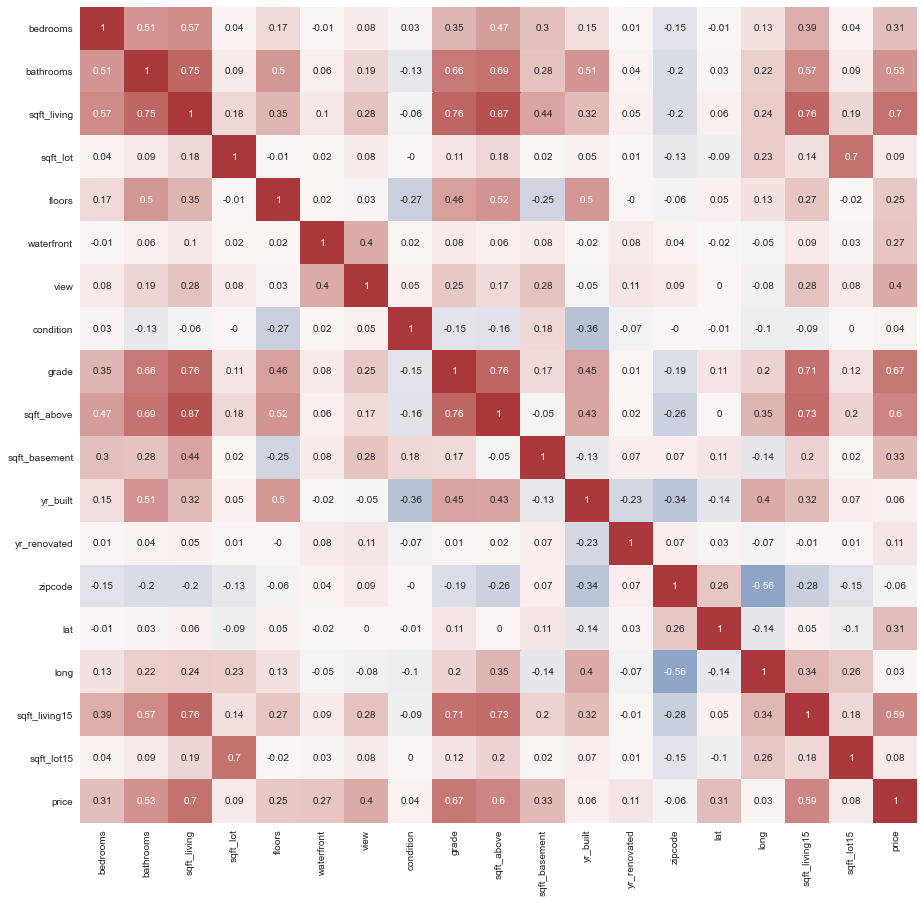

In [7]:
# Have a quick look at the correlation matrix
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(round(housing_price_train.corr(),2),annot=True,cbar=False,vmin=-1,vmax=1,cmap='vlag')
plt.savefig("correlation_matrix.png",dpi=200)
plt.show()


index        Method Prediction_number       MAE           MSE      RMSE  \
0      0        Linear                 1  126707.0  4.825086e+10  219661.0   
1      0    Polynomial                 1  101348.0  2.679636e+10  163696.0   
2      0  DecisionTree                 1  101957.0  4.262642e+10  206462.0   
3      0           KNN                 1  158728.0  7.796440e+10  279221.0   
4      0  RandomForest                 1   72223.0  2.237057e+10  149568.0   

      R2  R2_adj Method_Description  
0  0.683   0.682           Raw Data  
1  0.824   0.824           Raw Data  
2  0.720   0.719           Raw Data  
3  0.488   0.487           Raw Data  
4  0.853   0.853           Raw Data

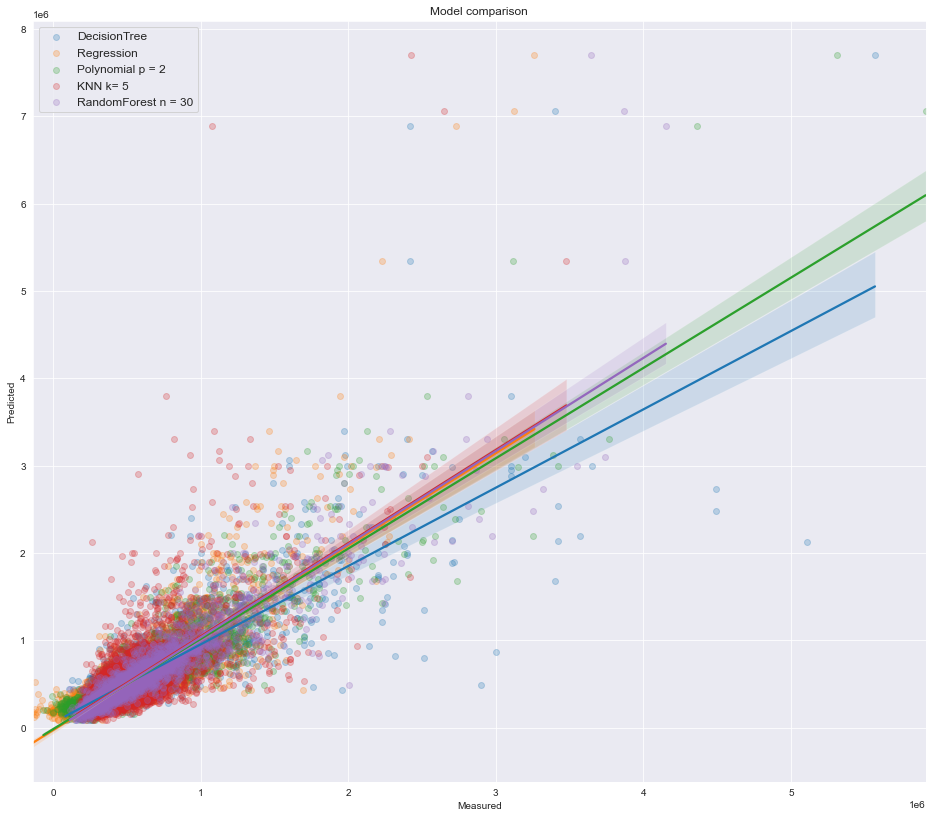

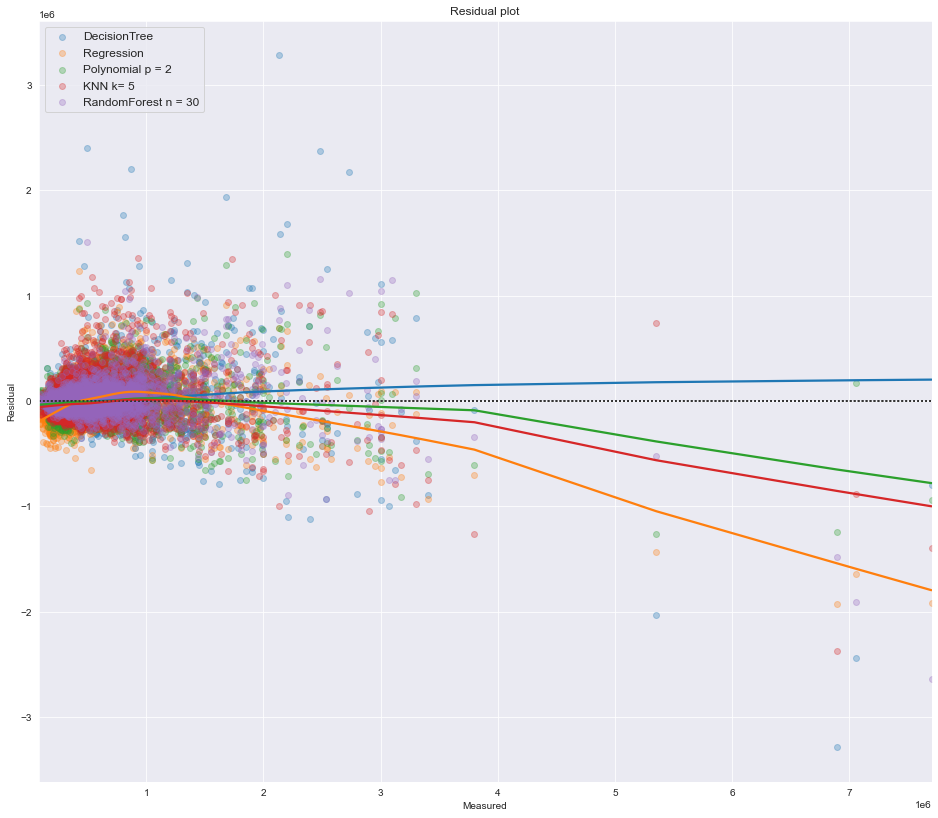

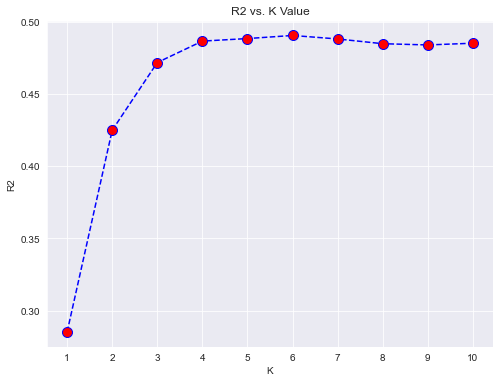

In [8]:
# Set Model number
m_num = 1

#drop the date
X_train_ = X_train.drop(columns=['date'],axis=1)
X_test_ = X_test.drop(columns=['date'],axis=1)

#add descirption of changes
desc = 'Raw Data'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             k=5,
                                                                             tr_n=30,
                                                                             describe=desc))

# EDA

In [9]:
# check price descriptions, there are no null values so we don't have drop anything that will mess with the data
housing_price_train['price'].describe()

count    1.619700e+04
mean     5.417612e+05
std      3.593701e+05
min      7.800000e+04
25%      3.249000e+05
50%      4.525000e+05
75%      6.500000e+05
max      5.570000e+06
Name: price, dtype: float64

## Getting a picture of the location distribution and year built

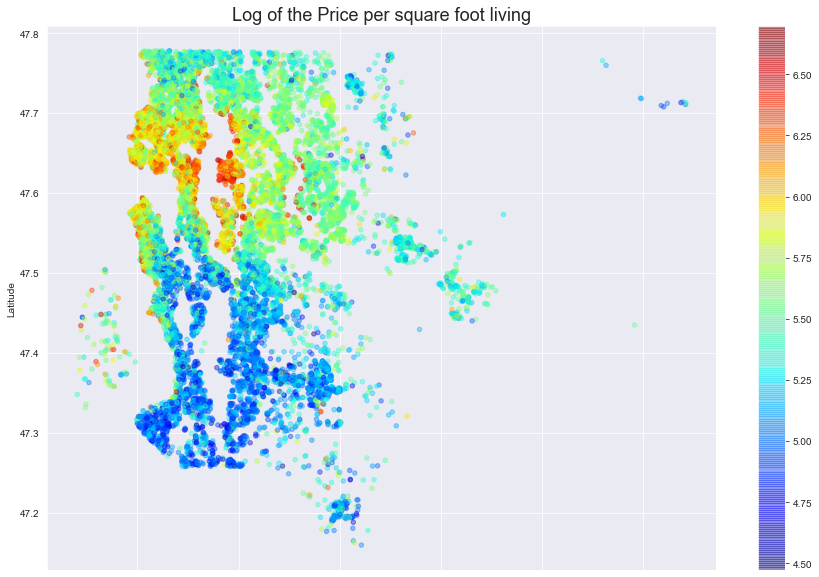

In [10]:
# plot the price per sqquare foot
housing_price_train.plot(kind="scatter", x="long", y="lat",
                      c=np.log(housing_price_train['price']/housing_price_train['sqft_living']), cmap=plt.get_cmap("jet"),
                      colorbar=True, alpha=0.4, figsize=(15,10))
plt.title('Log of the Price per square foot living',fontdict={'fontsize': 18})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Here we can see the houses in the centre of seattle and on the waterside have got much more value per square foot

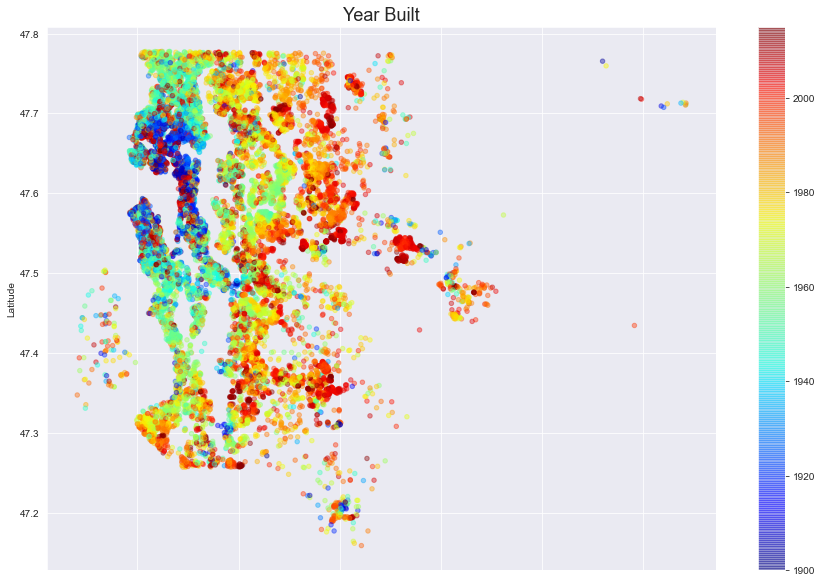

In [11]:
# plot the price per sqquare foot
housing_price_train.plot(kind="scatter", x="long", y="lat",
                      c=housing_price_train['yr_built'], cmap=plt.get_cmap("jet"),
                      colorbar=True, alpha=0.4, figsize=(15,10))
plt.title('Year Built',fontdict={'fontsize': 18})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Here we can see that the oldest building are in the city centre and from around 1950, construction spread outwards towards the rural parts. Then we can see alot if reconstruction took place in the 2000's in the city centre.

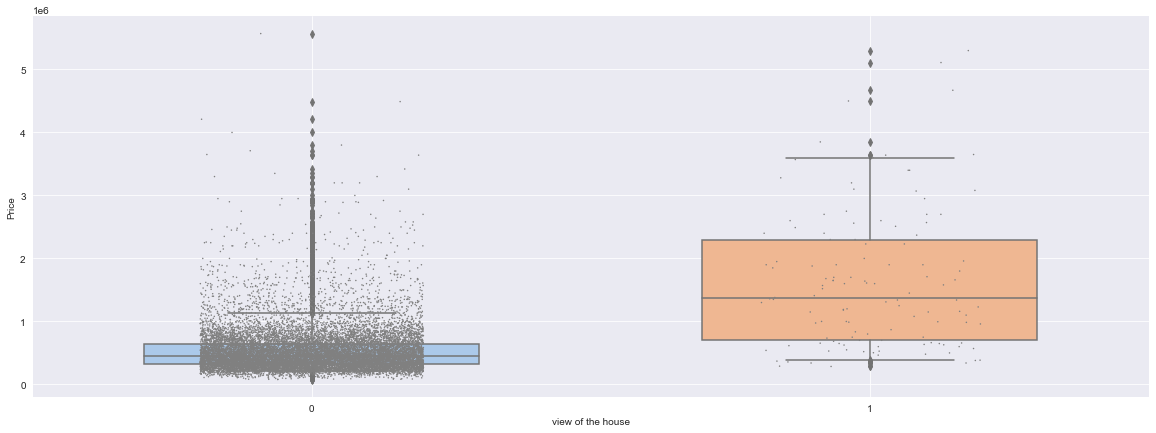

In [12]:
fig, ax = plt.subplots(figsize=(20, 7))

# boxplot the grade and proce
sns.boxplot(x="waterfront", y="price", data=housing_price_train,whis=[5, 95], 
            width=.6, palette="pastel")

# Add in points to show each observation
sns.stripplot(x="waterfront", y="price", data=housing_price_train,
              size=1.5, color=".5", linewidth=0,jitter='0.2')

ax.xaxis.grid(True)
ax.set(ylabel="Price",xlabel='view of the house')
sns.despine(trim=True, left=True)

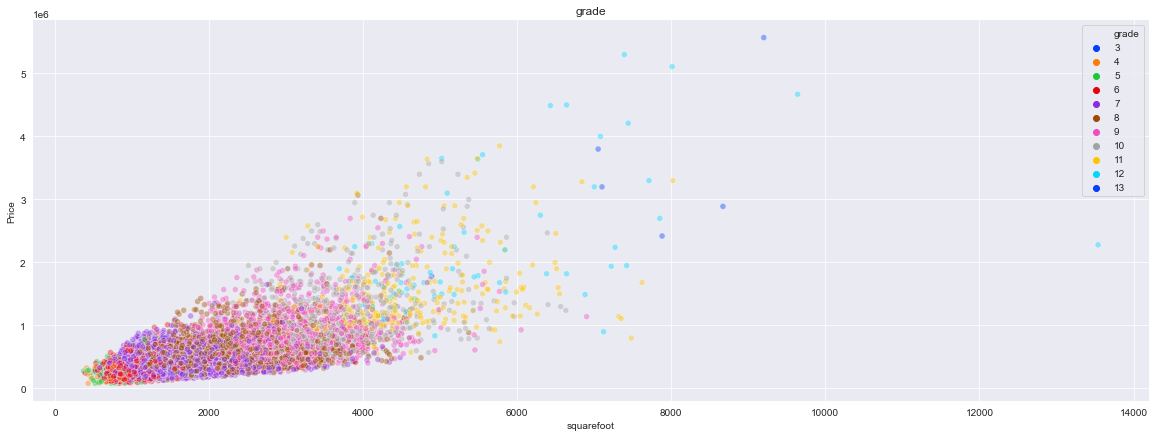

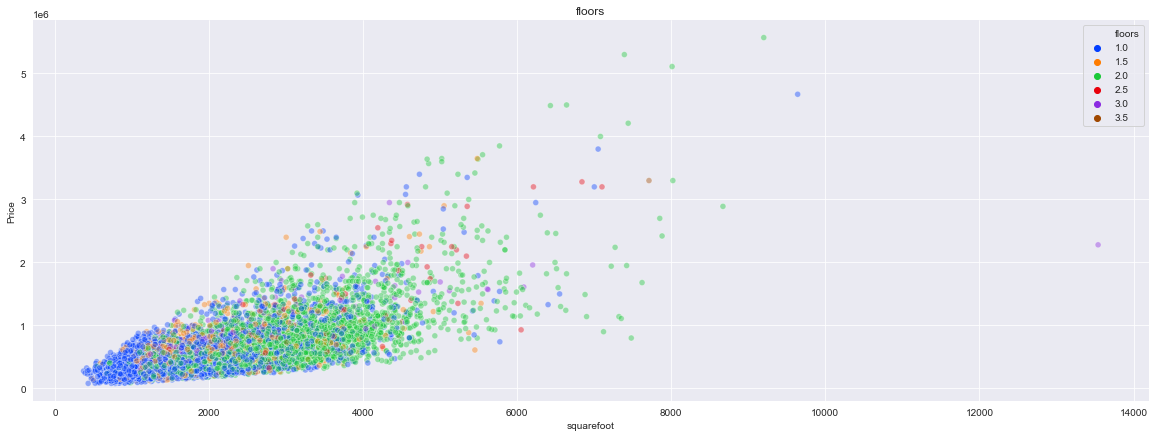

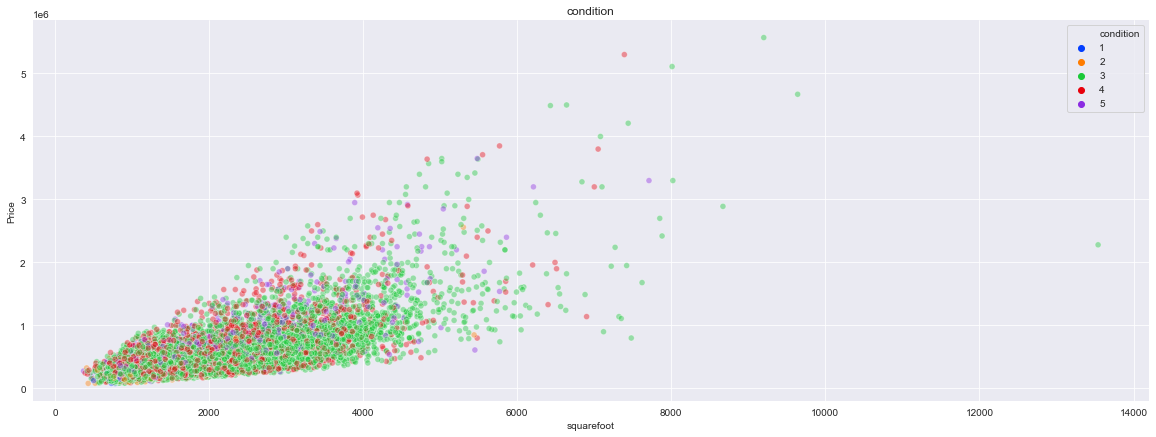

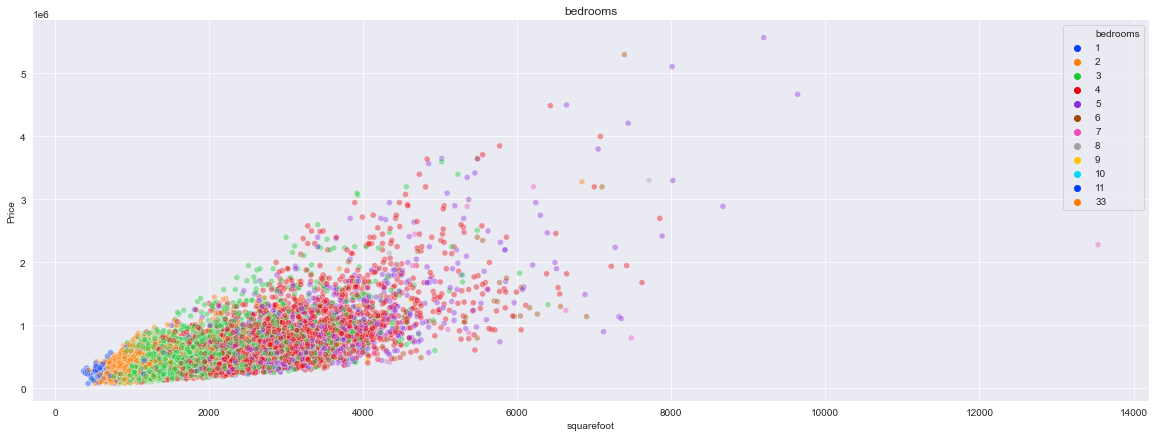

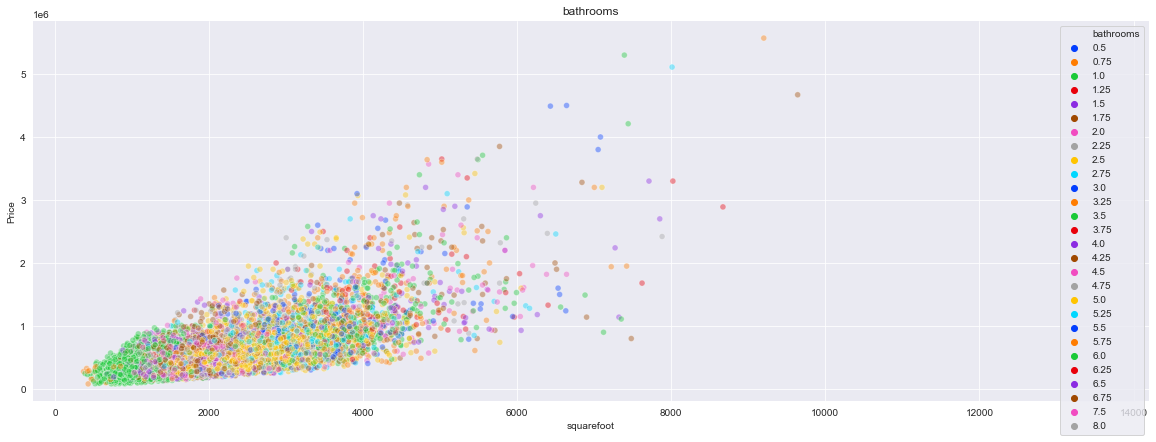

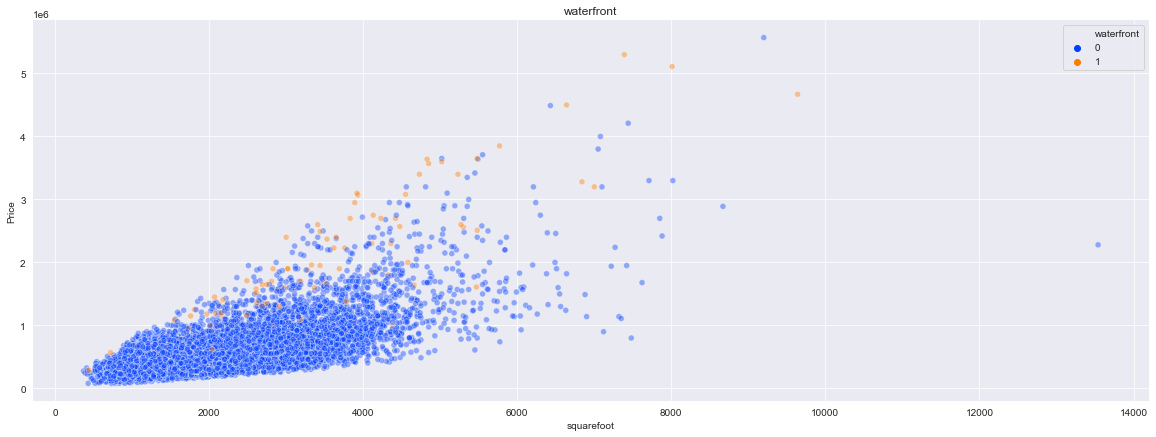

In [13]:
for i in tqdm(['grade','floors','condition','bedrooms','bathrooms','waterfront']):
    fig, ax = plt.subplots(figsize=(20, 7))
    sns.scatterplot(data=housing_price_train, x="sqft_living", y="price", hue=i, palette="bright",alpha=0.4)
    ax.xaxis.grid(True)
    ax.set(ylabel="Price",xlabel='squarefoot',title=i)
    sns.despine(trim=True, left=True)
    plt.show()


In [14]:
housing_price_train.groupby('zipcode')['price'].median().sort_values().index

Int64Index([98002, 98168, 98032, 98188, 98001, 98003, 98148, 98178, 98198,
            98023, 98031, 98022, 98030, 98055, 98042, 98146, 98092, 98106,
            98108, 98058, 98038, 98010, 98118, 98133, 98155, 98166, 98056,
            98126, 98019, 98014, 98059, 98045, 98125, 98034, 98028, 98024,
            98144, 98070, 98011, 98136, 98065, 98072, 98107, 98117, 98103,
            98008, 98007, 98116, 98115, 98027, 98177, 98029, 98122, 98052,
            98074, 98053, 98105, 98077, 98033, 98102, 98199, 98075, 98006,
            98005, 98109, 98119, 98112, 98040, 98004, 98039],
           dtype='int64', name='zipcode')

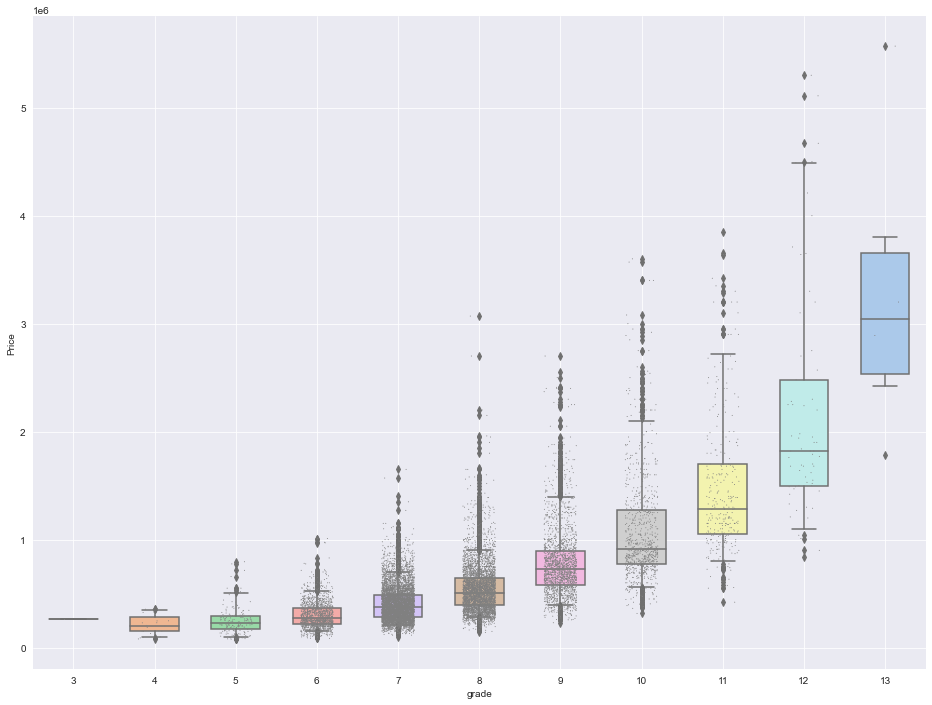

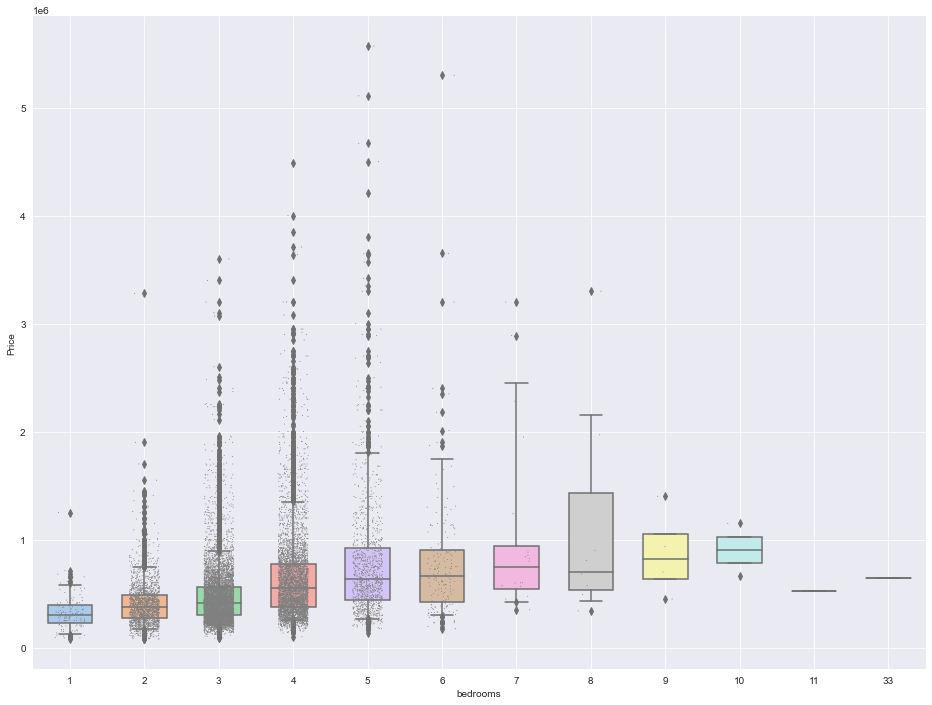

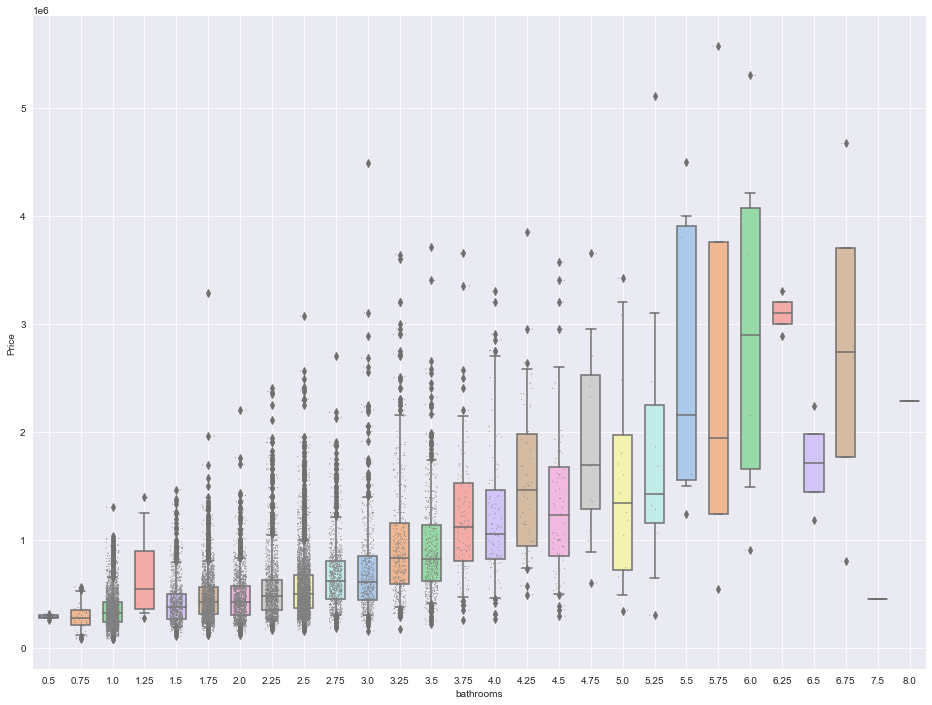

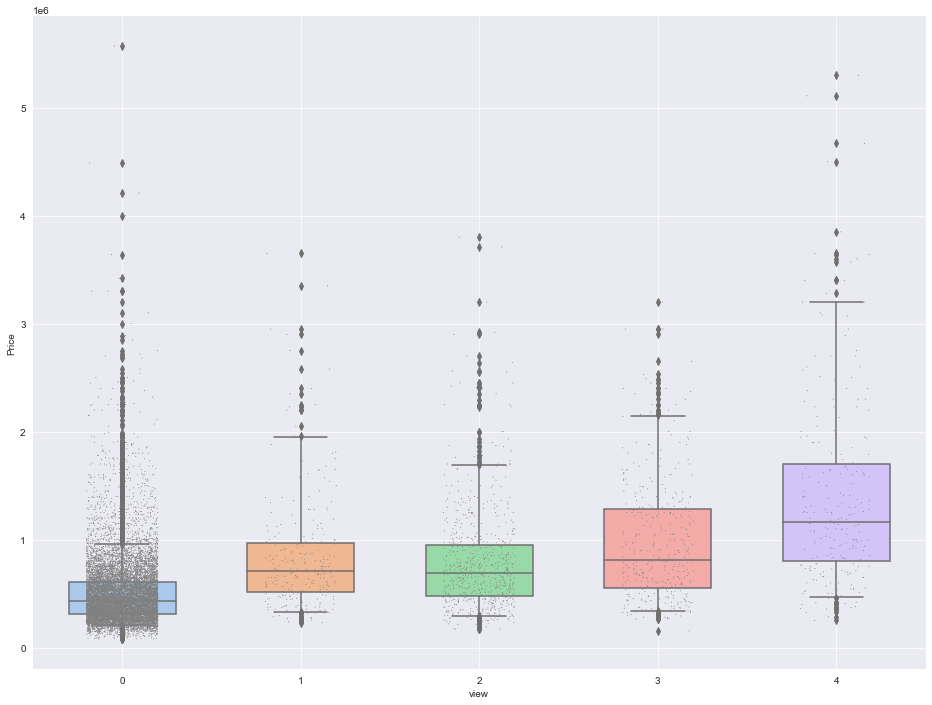

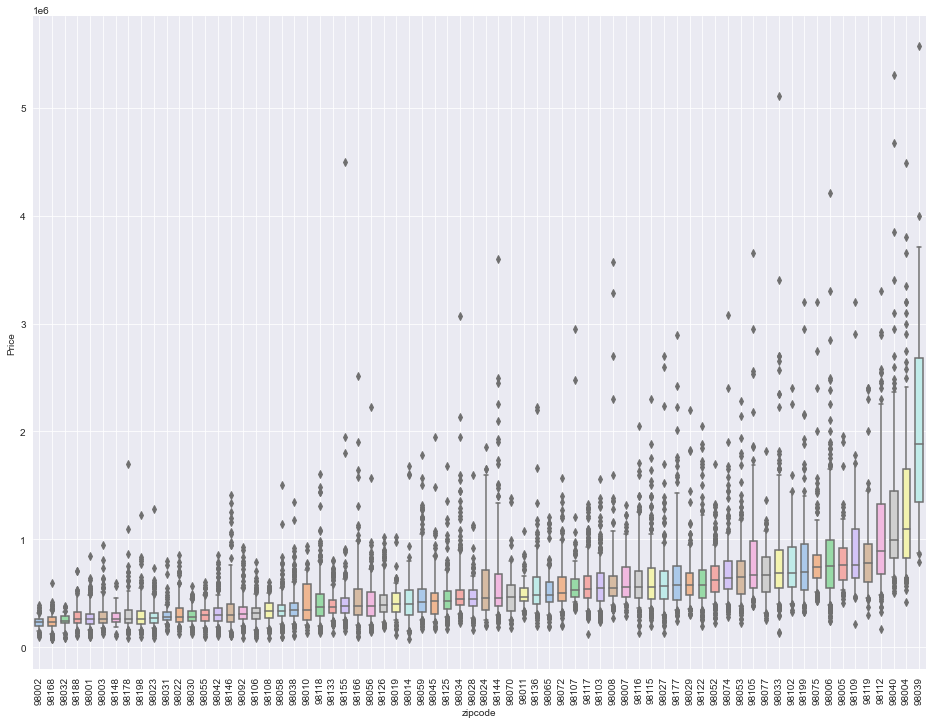

In [15]:
for i in tqdm(['grade','bedrooms','bathrooms','view','zipcode']):
    fig, ax = plt.subplots(figsize=(16, 12))

    # boxplot the grade and proce
    if i == 'zipcode':
        sns.boxplot(x=i, y="price", data=housing_price_train,
                    order=housing_price_train.groupby('zipcode')['price'].median().sort_values().index,
                    whis=[5, 95], width=.6, palette="pastel")
    else:
        sns.boxplot(x=i, y="price", data=housing_price_train,
            whis=[5, 95], width=.6, palette="pastel")
        sns.stripplot(x=i, y="price", data=housing_price_train,size=1, color=".5", linewidth=0,jitter='0.2')

    
    # Add in points to show each observation


    ax.xaxis.grid(True)
    ax.set(ylabel="Price")
    if i == 'zipcode':
        plt.xticks(rotation= 90)

    sns.despine(trim=True, left=True)
    plt.savefig(str(i)+".png",dpi=200)

In [ ]:
# add comments

# Removing Whiskers for prediction

bedrooms
Skewness: 2.506940
Kurtosis: 65.500459


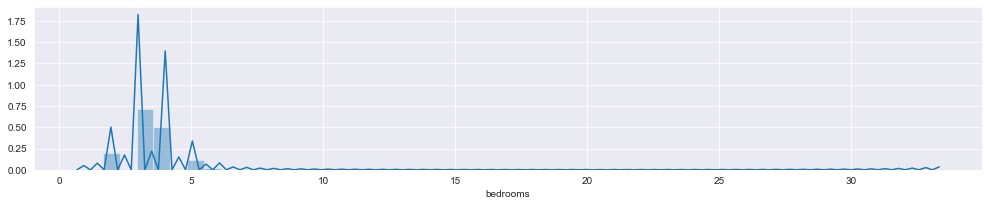

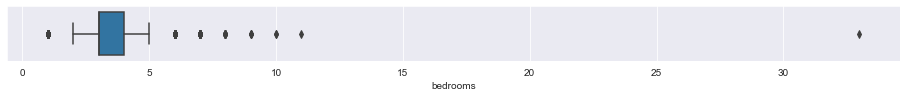

bathrooms
Skewness: 0.525682
Kurtosis: 1.243919


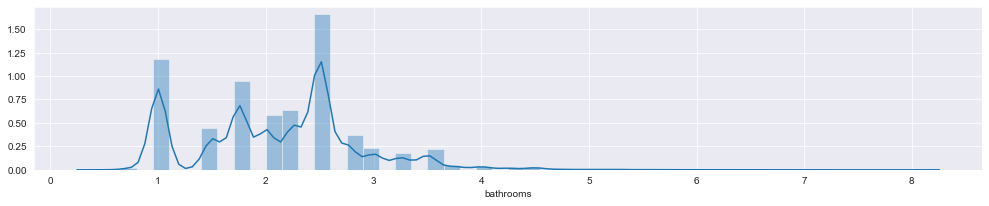

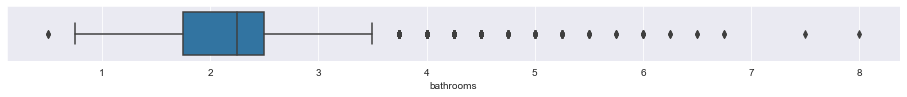

sqft_living
Skewness: 1.434809
Kurtosis: 4.822156


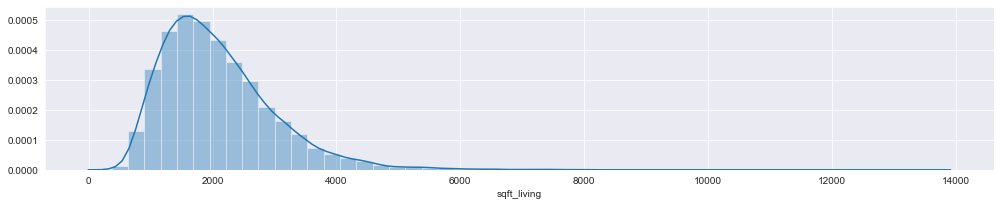

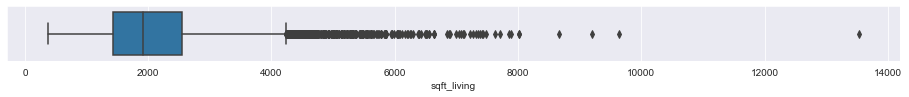

sqft_lot
Skewness: 13.389415
Kurtosis: 305.913503


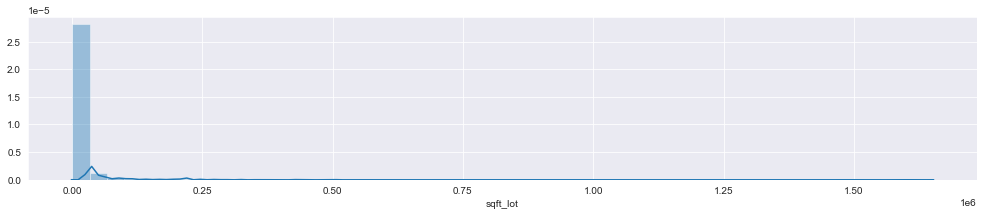

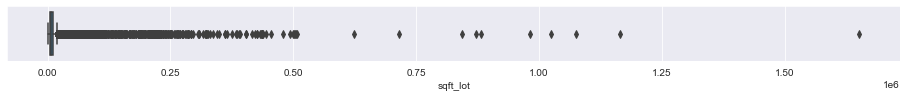

floors
Skewness: 0.611923
Kurtosis: -0.487182


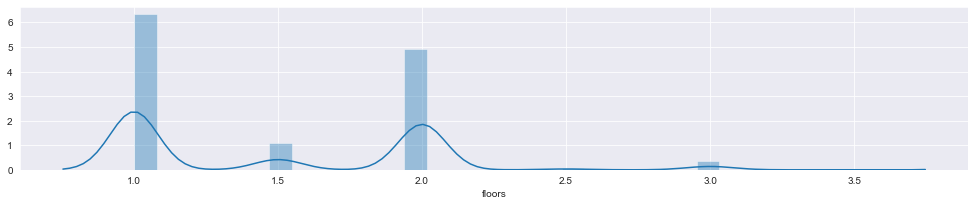

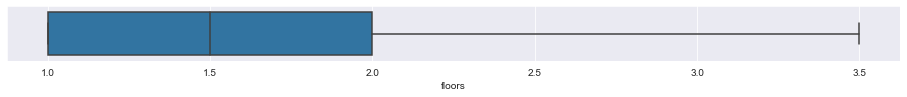

waterfront
Skewness: 11.392714
Kurtosis: 127.809706


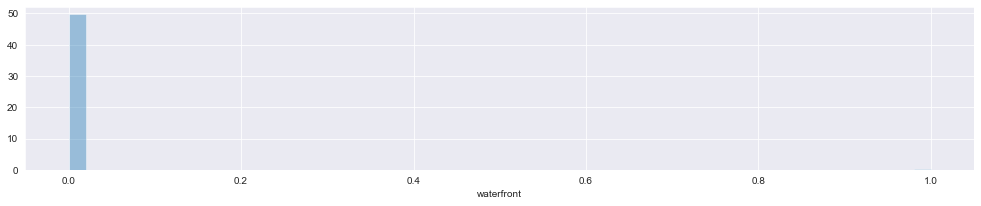

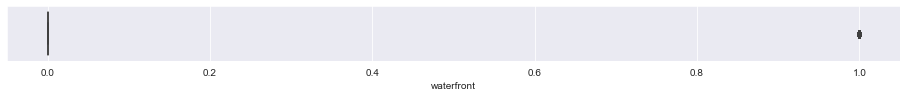

view
Skewness: 3.360006
Kurtosis: 10.642362


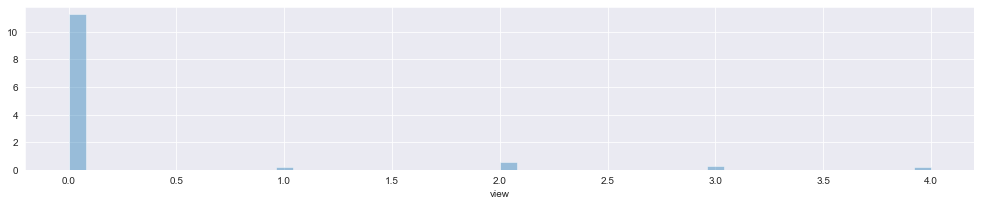

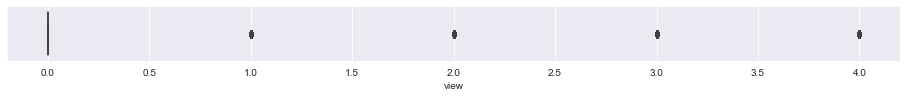

condition
Skewness: 1.024874
Kurtosis: 0.489826


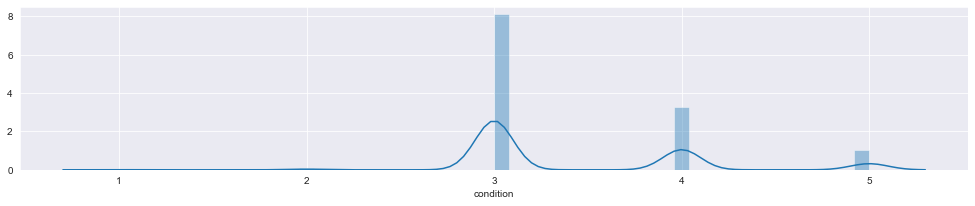

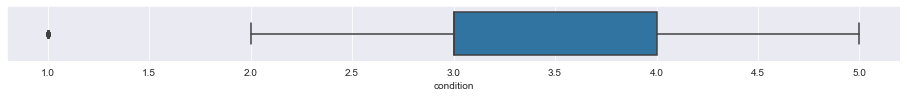

grade
Skewness: 0.766198
Kurtosis: 1.059924


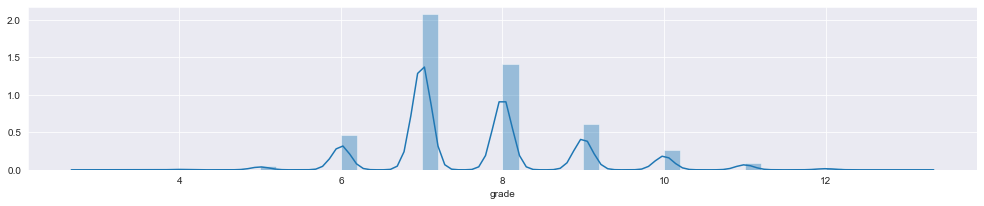

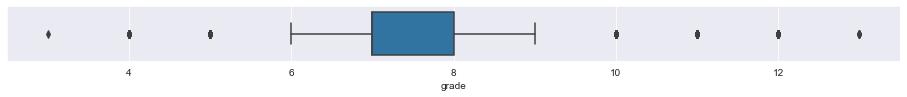

sqft_above
Skewness: 1.426009
Kurtosis: 3.216036


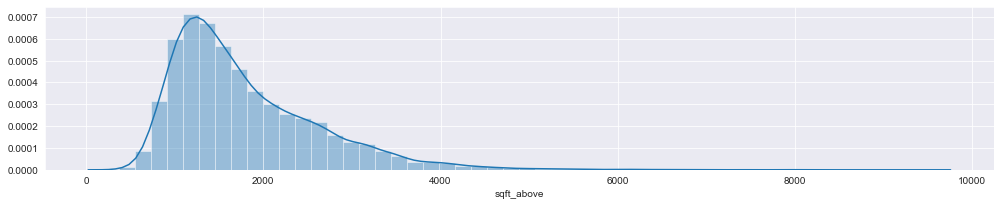

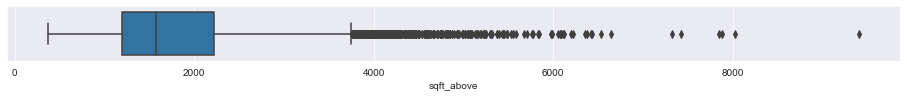

sqft_basement
Skewness: 1.605603
Kurtosis: 2.970497


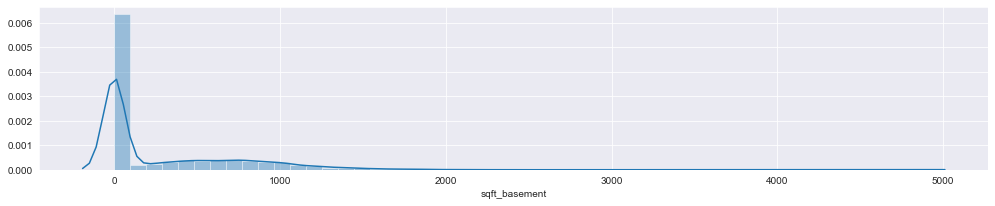

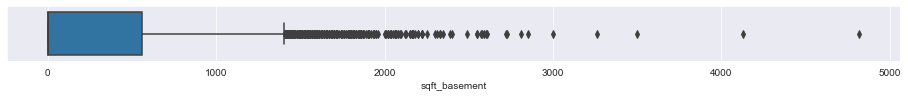

yr_built
Skewness: -0.469985
Kurtosis: -0.655108


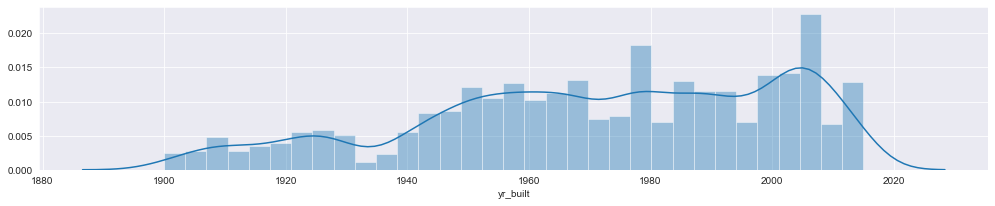

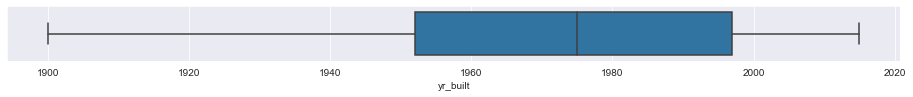

yr_renovated
Skewness: 4.549434
Kurtosis: 18.701138


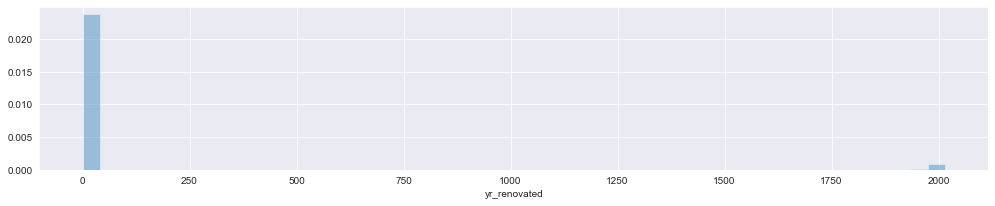

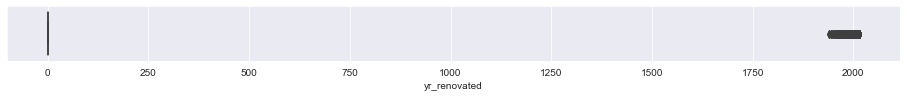

zipcode
Skewness: 0.399594
Kurtosis: -0.854893


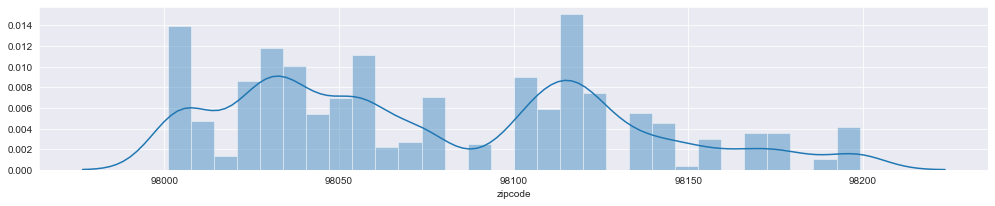

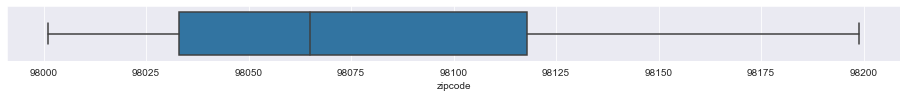

lat
Skewness: -0.495779
Kurtosis: -0.659980


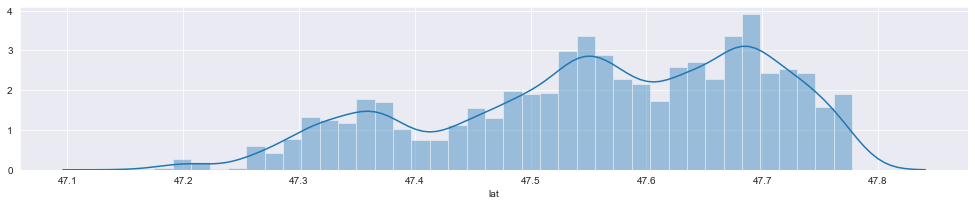

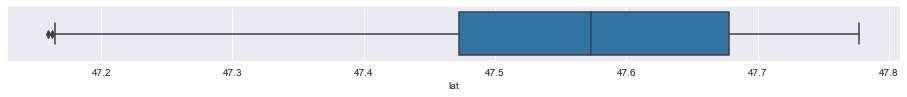

long
Skewness: 0.891143
Kurtosis: 1.074049


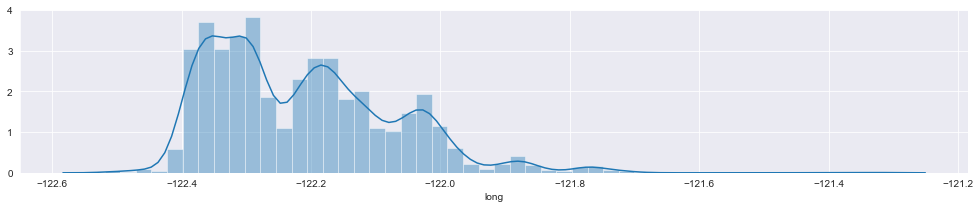

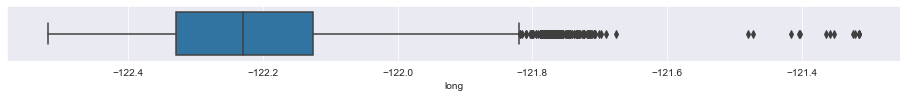

sqft_living15
Skewness: 1.110461
Kurtosis: 1.572332


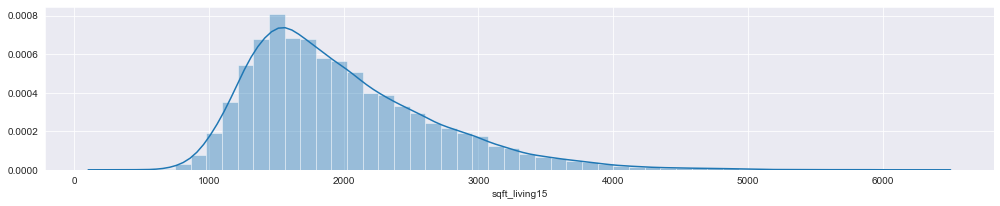

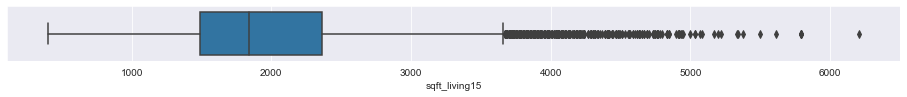

sqft_lot15
Skewness: 8.883781
Kurtosis: 125.658397


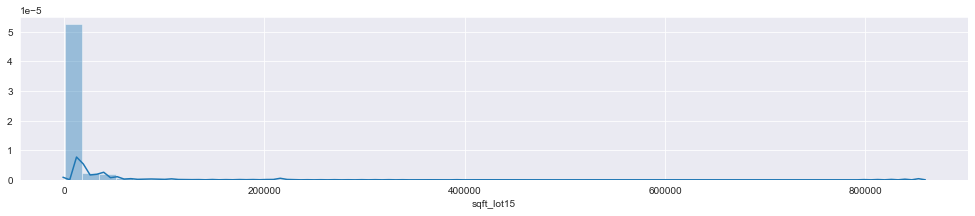

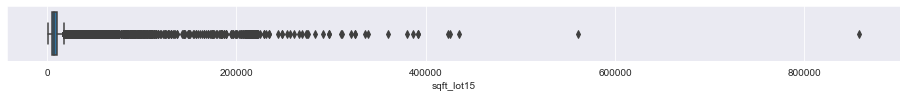

price
Skewness: 3.440154
Kurtosis: 21.871714


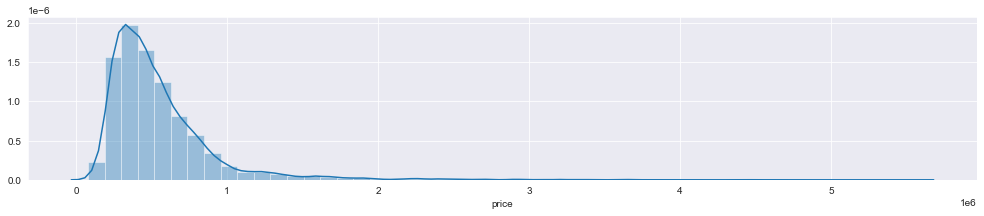

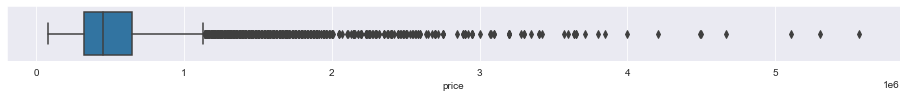

In [16]:
# Create a copy of the Dataset to rem
whisk_housing_price_train = housing_price_train.drop(columns='date',axis=1)

# Lets investigate which columns we can apply the removal of whiskers
for i in whisk_housing_price_train.columns:
    # print skewness and kurtosis
    print(i)
    print("Skewness: %f" % whisk_housing_price_train[i].skew())
    print("Kurtosis: %f" % whisk_housing_price_train[i].kurt())
    # plot the distributions and check the Skewness and Kurtosis
    plt.figure(figsize=(17,3))
    sns.distplot(whisk_housing_price_train[i])
    plt.show()
    # It seems there are a few outliers, so lets remove the upper whiskers
    plt.figure(figsize=(16,1))
    sns.boxplot(whisk_housing_price_train[i])
    plt.show()

sqft_living :  0.35 % of the data will be removed, which will be 56 data points
sqft_lot :  8.15 % of the data will be removed, which will be 1316 data points
sqft_above :  0.11 % of the data will be removed, which will be 17 data points
sqft_basement :  0.08 % of the data will be removed, which will be 12 data points
sqft_living15 :  0.09 % of the data will be removed, which will be 13 data points
sqft_lot15 :  1.25 % of the data will be removed, which will be 185 data points
price :  1.75 % of the data will be removed, which will be 256 data points
sqft_living
Skewness: 0.793804
Kurtosis: 0.564860


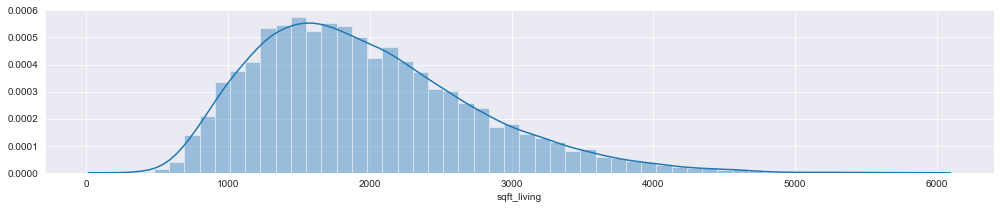

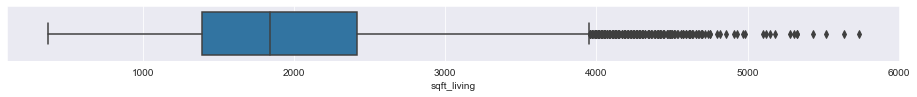

sqft_lot
Skewness: 1.205823
Kurtosis: 2.458766


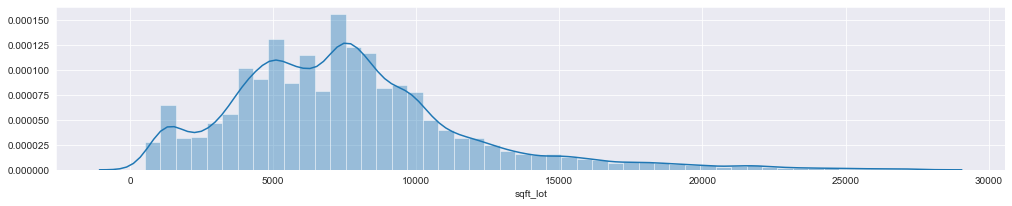

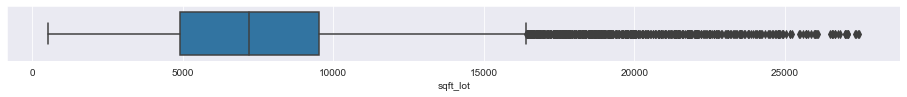

sqft_above
Skewness: 1.059555
Kurtosis: 0.849825


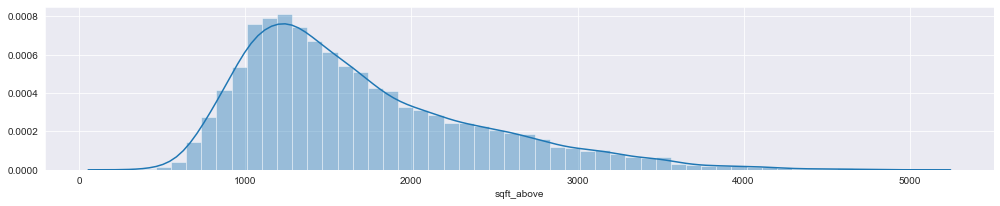

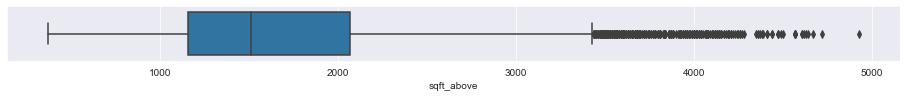

sqft_basement
Skewness: 1.363827
Kurtosis: 1.009402


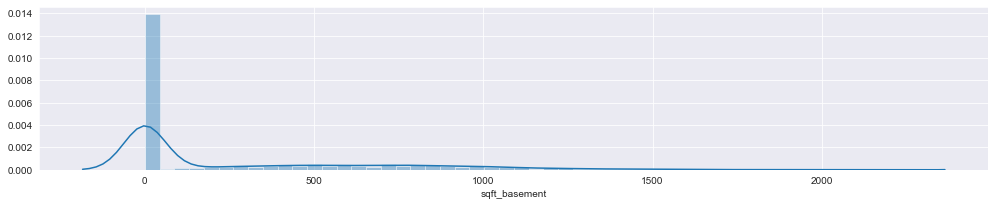

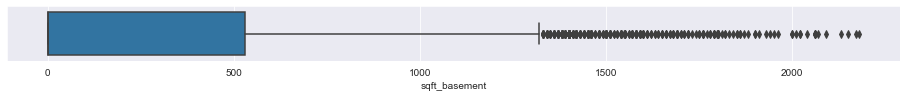

sqft_living15
Skewness: 0.997617
Kurtosis: 1.033060


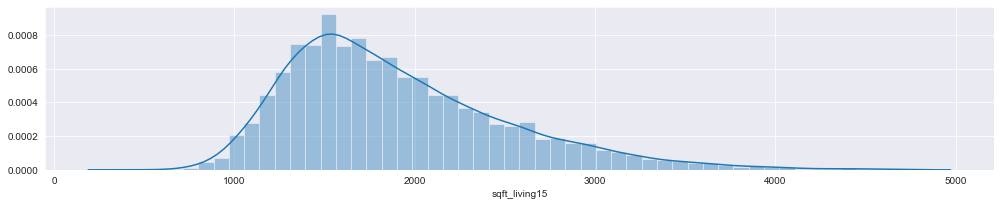

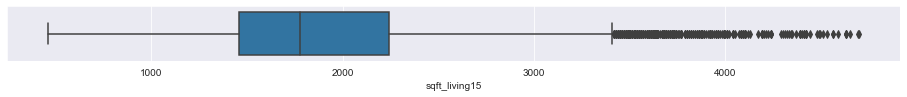

sqft_lot15
Skewness: 0.924143
Kurtosis: 1.776702


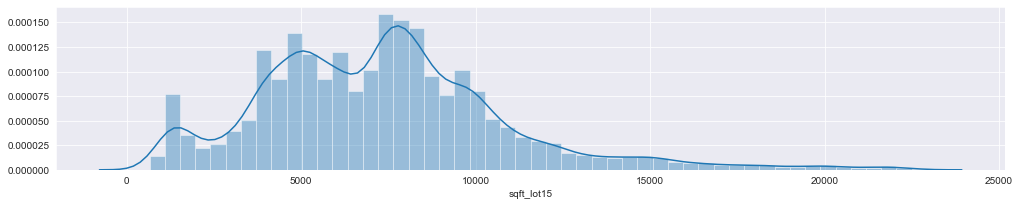

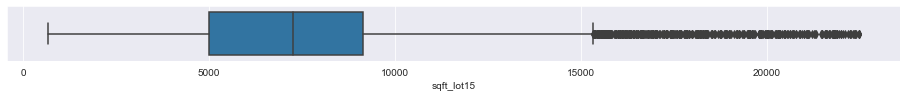

price
Skewness: 1.314446
Kurtosis: 2.045071


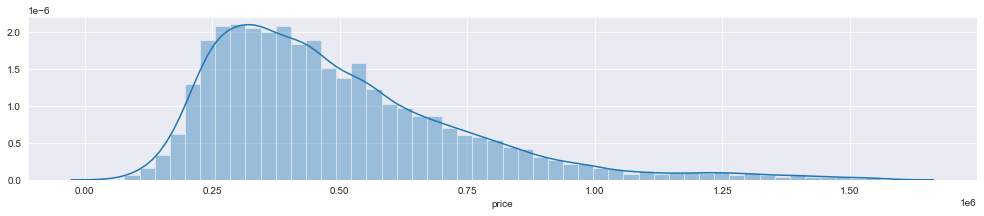

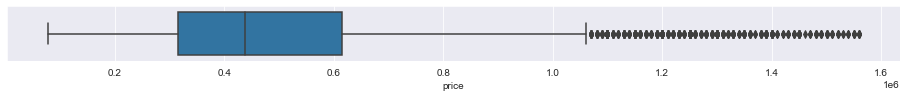

In [17]:
# Create a copy of the Dataset to rem
whisk_housing_price_train = housing_price_train.drop(columns='date',axis=1)


cols_to_cut = ['sqft_living', 'sqft_lot', 'sqft_above',
                   'sqft_basement','sqft_living15', 'sqft_lot15', 'price']

for i in cols_to_cut:
    # check how any datapoints we will be dropping
    iqr = np.percentile(whisk_housing_price_train[i],75) - np.percentile(whisk_housing_price_train[i],25)
    upper_limit = np.percentile(whisk_housing_price_train[i],75) + 3*iqr
    outliers = whisk_housing_price_train[whisk_housing_price_train[i] > upper_limit].index.tolist()
    print(i,": ",round((len(outliers)/len(whisk_housing_price_train))*100,2),'% of the data will be removed, which will be',len(outliers),'data points')

    # drop the datapoints and reset index
    whisk_housing_price_train = whisk_housing_price_train[whisk_housing_price_train[i] < upper_limit]
    whisk_housing_price_train = whisk_housing_price_train.reset_index(drop=True)

# Lets investigate which columns we can apply the removal of whiskers
for i in cols_to_cut:
    # print skewness and kurtosis
    print(i)
    print("Skewness: %f" % whisk_housing_price_train[i].skew())
    print("Kurtosis: %f" % whisk_housing_price_train[i].kurt())
    # plot the distributions and check the Skewness and Kurtosis
    plt.figure(figsize=(17,3))
    sns.distplot(whisk_housing_price_train[i])
    plt.show()
    # It seems there are a few outliers, so lets remove the upper whiskers
    plt.figure(figsize=(16,1))
    sns.boxplot(whisk_housing_price_train[i])
    plt.show()

## Test models on removed whiskers

index        Method Prediction_number       MAE           MSE      RMSE  \
0      0        Linear                 2  140516.0  8.810946e+10  296832.0   
1      0    Polynomial                 2  140516.0  8.810946e+10  296832.0   
2      0  DecisionTree                 2  107214.0  6.423140e+10  253439.0   
3      0           KNN                 2  164969.0  1.009615e+11  317744.0   
4      0  RandomForest                 2   84381.0  5.476786e+10  234025.0   

      R2  R2_adj Method_Description  
0  0.422   0.420  Removing Whiskers  
1  0.422   0.420  Removing Whiskers  
2  0.578   0.577  Removing Whiskers  
3  0.337   0.335  Removing Whiskers  
4  0.641   0.639  Removing Whiskers

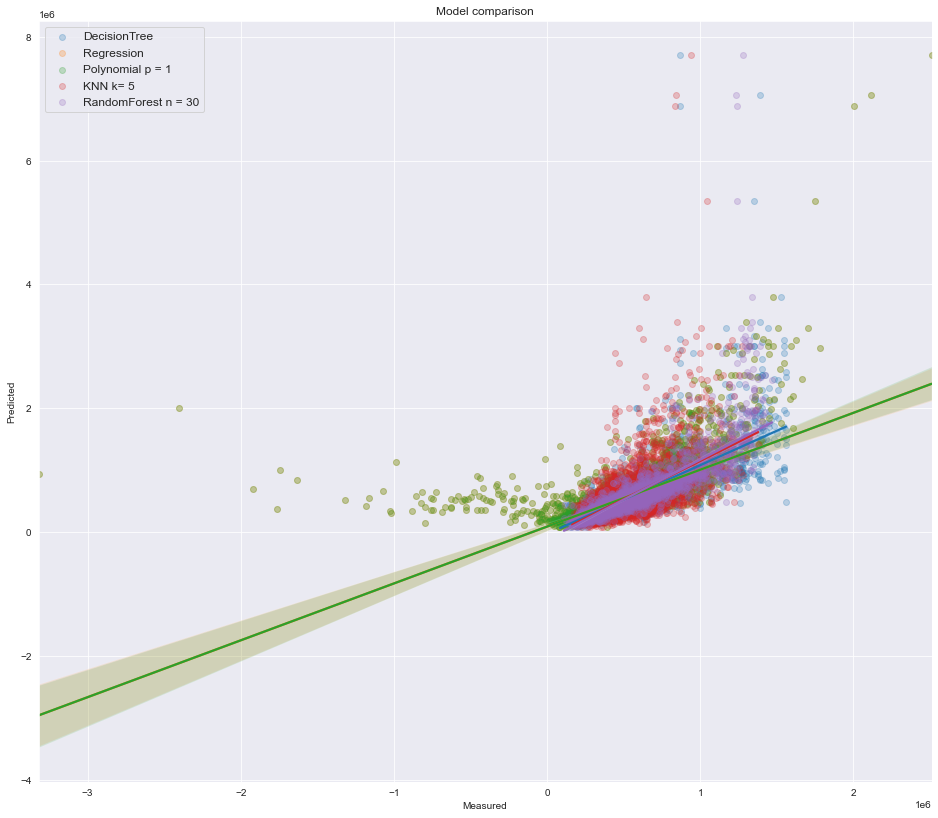

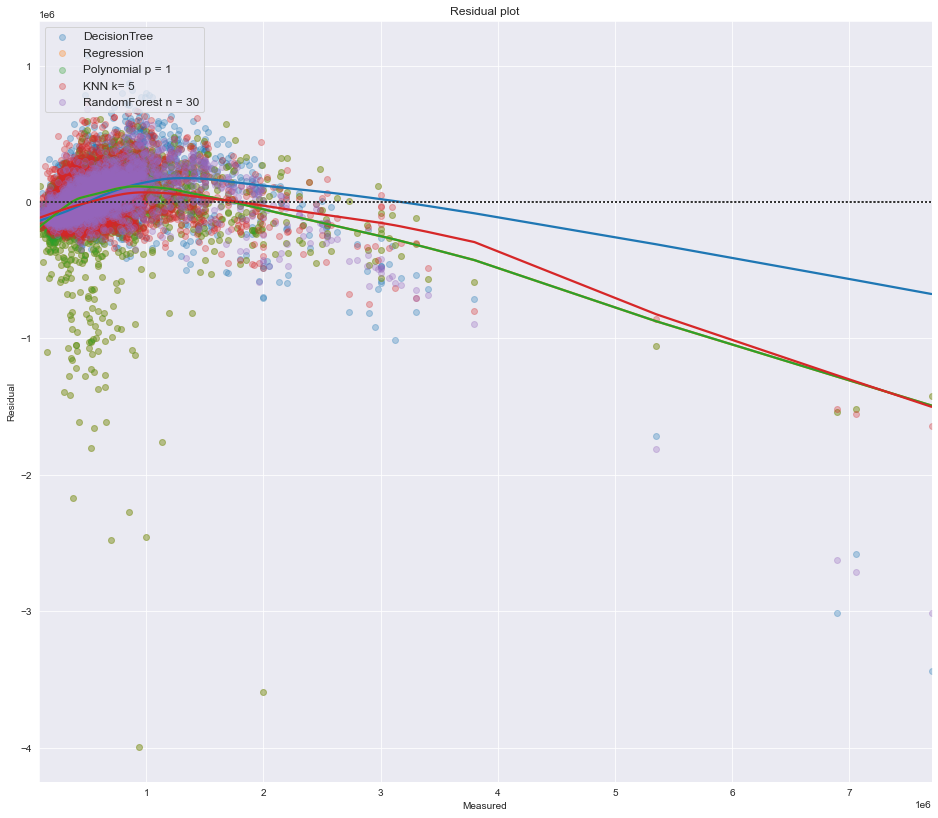

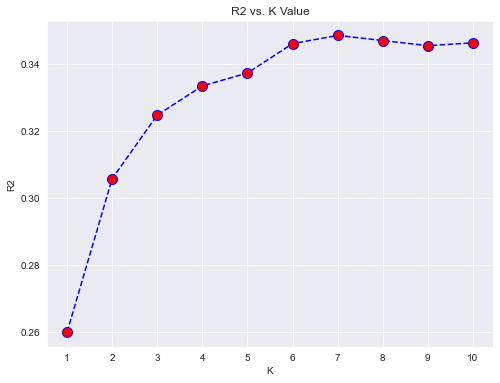

In [18]:
# increase model number
m_num = m_num +1

#drop the date and price
X_train_ = whisk_housing_price_train.drop(columns=['price'],axis=1)
y_train_ = whisk_housing_price_train['price']
X_test_ = X_test.drop(columns=['date'],axis=1)

#add descirption of changes
desc = 'Removing Whiskers'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=1,
                                                                             k=5,
                                                                             tr_n=30,
                                                                             describe=desc))

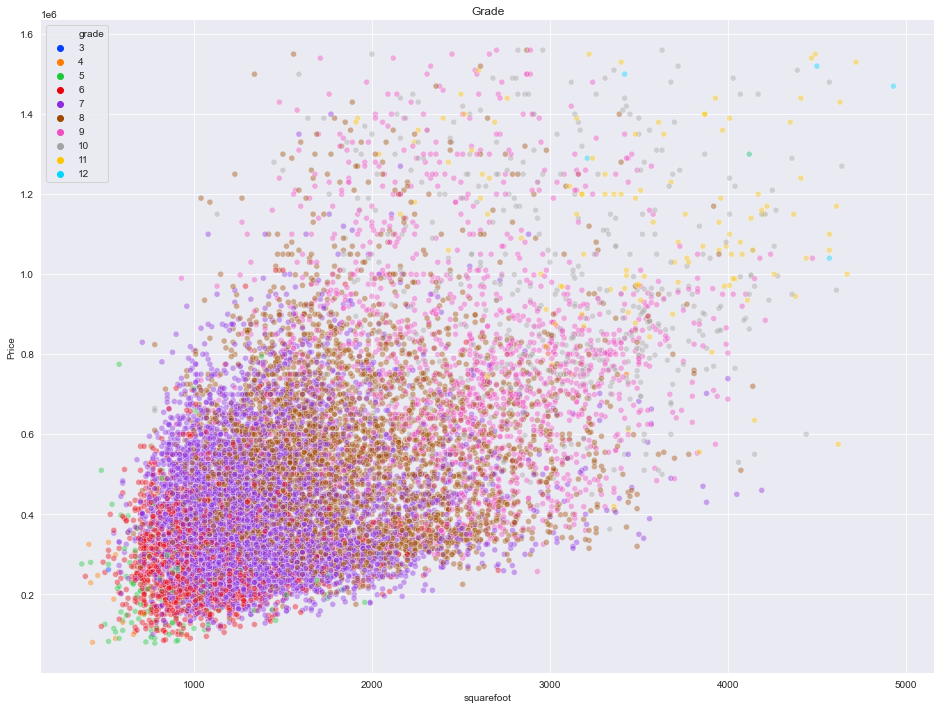

In [19]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.scatterplot(data=whisk_housing_price_train, x="sqft_above", y="price", hue='grade', palette="bright",alpha=0.4)
ax.xaxis.grid(True)
ax.set(ylabel="Price",xlabel='squarefoot',title='Grade')
sns.despine(trim=True, left=True)
plt.savefig("grade_sqft.png",dpi=200)
plt.show()


# Adding extra zipcode feature for the prediction

In [20]:
housing_price_train_zip = housing_price_train.copy()
X_test_zip = X_test.copy()

# Check if difference to the average living space from the surrounding area
housing_price_train_zip.date = pd.to_datetime(housing_price_train_zip.date)
housing_price_train_zip['sell_month'] = housing_price_train_zip.date.dt.month
housing_price_train_zip['sell_day'] = housing_price_train_zip.date.dt.day
X_test_zip.date = pd.to_datetime(X_test_zip.date)
X_test_zip['sell_month'] = X_test_zip.date.dt.month
X_test_zip['sell_day'] = X_test_zip.date.dt.day


# Create catagorical column to show if the house was renovated and if there is a basement
housing_price_train_zip['basement'] = housing_price_train_zip['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
housing_price_train_zip['renovated'] = housing_price_train_zip['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
X_test_zip['basement'] = X_test_zip['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
X_test_zip['renovated'] = X_test_zip['yr_renovated'].apply(lambda x: 1 if x>0 else 0)


#Check the years since renovation and years since built
housing_price_train_zip['years_since_renovated'] = np.where(housing_price_train_zip.yr_renovated > 0,
                                                        housing_price_train_zip.date.dt.year-housing_price_train_zip.yr_renovated,
                                                        housing_price_train_zip.date.dt.year-housing_price_train_zip.yr_built)
housing_price_train_zip['years_since_built'] = housing_price_train_zip.date.dt.year - housing_price_train_zip.yr_built
X_test_zip['years_since_renovated'] = np.where(X_test_zip.yr_renovated > 0,
                                           X_test_zip.date.dt.year-X_test_zip.yr_renovated,
                                           X_test_zip.date.dt.year-X_test_zip.yr_built)
X_test_zip['years_since_built'] = X_test_zip.date.dt.year - X_test_zip.yr_built


# create a df with the average sqft_living price per zipcode of train_d and merge onto test_df zipcode
temp_df = pd.DataFrame()

housing_price_train_zip['avg_price_sqft_total'] = housing_price_train_zip['price'] / housing_price_train_zip['sqft_living']

temp_df['zip_price_sqft'] = housing_price_train_zip.groupby('zipcode')['avg_price_sqft_total'].mean()
housing_price_train_zip = pd.merge(housing_price_train_zip,temp_df,on='zipcode',how='left')
X_test_zip = pd.merge(X_test_zip,temp_df,on='zipcode',how='left')



In [21]:
housing_price_train_zip

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     2015-02-20         4       1.75         1570      7650     1.0   
1     2014-08-27         4       2.00         2100     12620     1.0   
2     2015-04-16         3       1.75         1330     12618     1.0   
3     2014-06-26         2       1.00         1780     81021     1.0   
4     2015-03-04         3       2.50         1980      9725     2.0   
...          ...       ...        ...          ...       ...     ...   
16192 2014-08-04         3       1.75         1840     16679     1.0   
16193 2015-03-23         4       2.50         3450     39683     2.0   
16194 2014-05-20         3       1.50         1650      9936     1.0   
16195 2015-01-14         3       2.25         1900     18000     1.0   
16196 2015-04-10         5       4.00         3460      5400     2.0   

       waterfront  view  condition  grade  ...  sqft_lot15   price  \
0               0     0          3      7  ...        7650  430000   
1               0     0          4      7  ...        7840  500000   
2               0     3          3      7  ...        8429  265000   
3               0     3          4      9  ...       26723  270000   
4               0     0          3      8  ...        9834  470000   
...           ...   ...        ...    ...  ...         ...     ...   
16192           0     0          3      8  ...       15571  274950   
16193           0     0          3     10  ...       39750  720000   
16194           0     0          3      7  ...        9890  219950   
16195           0     0          4      7  ...       15000  212000   
16196           0     0          3     10  ...        5400  980000   

       sell_month  sell_day  basement  renovated  years_since_renovated  \
0               2        20         1          0                     40   
1               8        27         0          0                     42   
2               4        16         0          0                     32   
3               6        26         0          0                     60   
4               3         4         0          0                     21   
...           ...       ...       ...        ...                    ...   
16192           8         4         0          0                     25   
16193           3        23         0          0                     13   
16194           5        20         1          0                     47   
16195           1        14         1          0                     47   
16196           4        10         1          0                      3   

       years_since_built  avg_price_sqft_total  zip_price_sqft  
0                     40            273.885350      280.417166  
1                     42            238.095238      265.246032  
2                     32            199.248120      170.189710  
3                     60            151.685393      151.809877  
4                     21            237.373737      223.036265  
...                  ...                   ...             ...  
16192                 25            149.429348      151.809877  
16193                 13            208.695652      212.934507  
16194                 47            133.303030      158.690451  
16195                 47            111.578947      148.341965  
16196                  3            283.236994      215.553464  

[16197 rows x 28 columns]

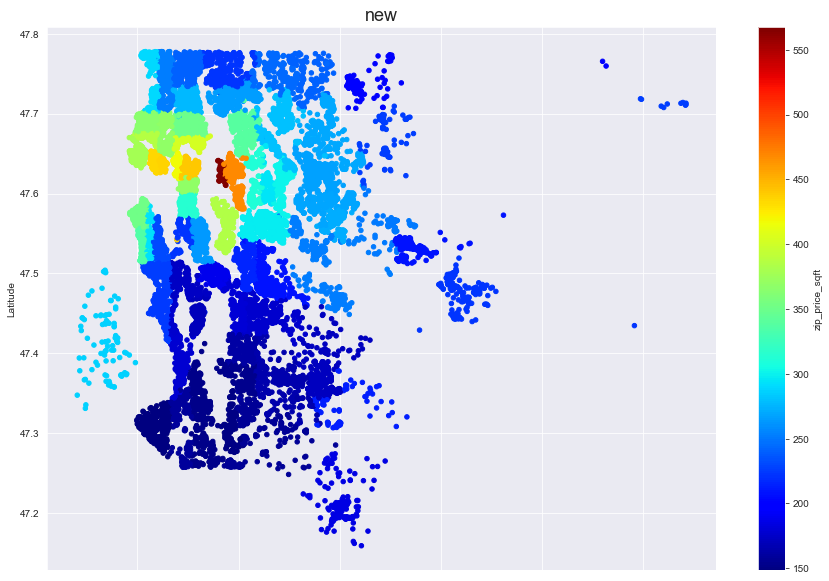

In [22]:

# plot the price per sqquare foot
housing_price_train_zip.plot(kind="scatter", x="long", y="lat",
                      c='zip_price_sqft',
                      cmap=plt.get_cmap("jet"),
                      colorbar=True, alpha=1, figsize=(15,10))
plt.title('new',fontdict={'fontsize': 18})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

AttributeError: 'PathCollection' object has no property 'hue'

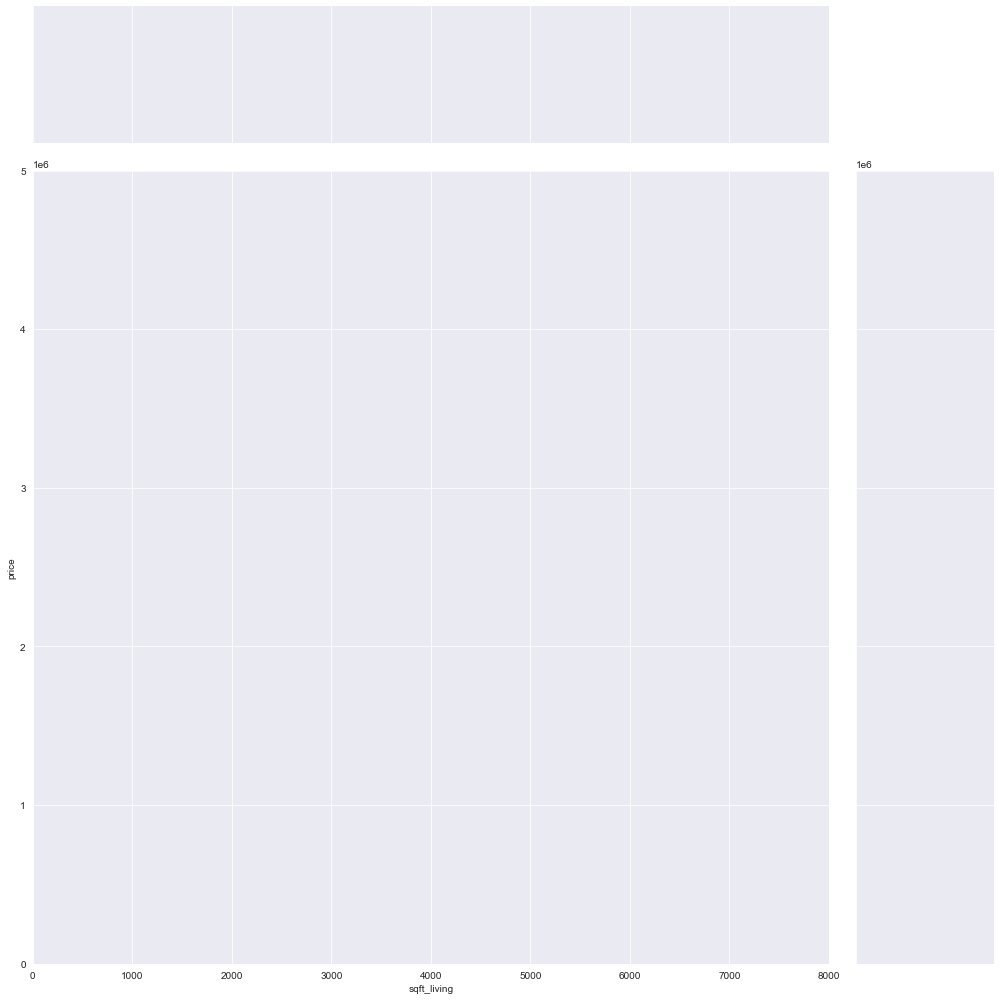

In [23]:
sns.jointplot(x='sqft_living', y='price', hue='zip_price_sqft',
              data=housing_price_train_zip,height=14, kind='scatter',xlim=(0,8000),ylim=(0,5000000))

plt.show()

In [ ]:
sns.jointplot(x='sqft_living', y='price', hue='grade',
              data=housing_price_train_zip,height=14, kind='scatter',xlim=(0,10000),ylim=(0,5000000))

plt.show()

In [ ]:
# Drop date column and temp_calcs
housing_price_train_zip = housing_price_train_zip.drop(columns=['date','avg_price_sqft_total'],axis=1)
X_test_zip = X_test_zip.drop(columns='date',axis=1)

In [ ]:
# increase model number
m_num = m_num +1

#drop the date and price
X_train_ = housing_price_train_zip.drop(columns=['price'],axis=1)
y_train_ = housing_price_train_zip['price']
X_test_ = X_test_zip

#add descirption of changes
desc = 'Adding Features incl. zipcode'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=4,
                                                                             tr_n=30,
                                                                             describe=desc))

## Adding scalers on features

In [ ]:
# increase model number
m_num = m_num +1

y_train_ = housing_price_train_zip['price']
X_train_ = housing_price_train_zip.drop(columns=['price'],axis=1)
X_test_ = X_test_zip.copy()


# Instantiate and fit the standard scaler
minmax = MinMaxScaler()
minmax_scaler = minmax.fit(X_train_)


# Apply the Scaller to the Train and Test data
X_train_ = pd.DataFrame(minmax_scaler.transform(X_train_))
X_test_ = pd.DataFrame(minmax_scaler.transform(X_test_))


#add descirption of changes
desc = 'Features: MinMax Scaler'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=4,
                                                                             tr_n=30,
                                                                             describe=desc))

In [ ]:
# increase model number
m_num = m_num +1

y_train_ = housing_price_train_zip['price']
X_train_ = housing_price_train_zip.drop(columns=['price'],axis=1)
X_test_ = X_test_zip.copy()

# Instantiate and fit the standard scaler
standard = StandardScaler()
standard_scaler = standard.fit(X_train_)

# Apply the Scaller to the Train and Test data
X_train_ = pd.DataFrame(standard_scaler.transform(X_train_))
X_test_ = pd.DataFrame(standard_scaler.transform(X_test_))

#add descirption of changes
desc = 'Features: Standard Scaler'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=5,
                                                                             tr_n=30,
                                                                             describe=desc))

In [ ]:
vif_df = housing_price_train_zip.drop(columns='price',axis=1)
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))] 
  
print(round(vif_data,1))

ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(round(housing_price_train_zip.corr(),1),annot=True,cbar=False,vmin=-1,vmax=1,cmap='Spectral')
plt.show()

## Initial dropping

In [ ]:
housing_price_train_zip_drop = housing_price_train_zip.copy()
X_test_zip_drop = X_test_zip.copy()

In [ ]:
drop_list = ['lat','long','yr_built']
housing_price_train_zip_drop = housing_price_train_zip.drop(columns=drop_list,axis=1)
X_test_zip_drop = X_test_zip_drop.drop(columns=drop_list,axis=1)

In [ ]:
vif_df = housing_price_train_zip_drop.drop(columns=['price'],axis=1)
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))] 
  
print(round(vif_data,1))

ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(round(housing_price_train_zip.corr(),1),annot=True,cbar=False,vmin=-1,vmax=1,cmap='Spectral')
plt.show()

In [ ]:
drop_list = ['sqft_living','condition','sqft_lot15','sqft_living15','yr_renovated']
housing_price_train_zip_drop = housing_price_train_zip_drop.drop(columns=drop_list,axis=1)
X_test_zip_drop = X_test_zip_drop.drop(columns=drop_list,axis=1)

In [ ]:
vif_df = housing_price_train_zip_drop.drop(columns='price',axis=1)
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))] 
  
print(round(vif_data))

ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(round(housing_price_train_zip_drop.corr(),2),annot=True,cbar=False,vmin=-1,vmax=1,cmap='Spectral')
plt.show()

## Apply model after removing high VIF and low correlated features to the target variable

In [ ]:
housing_price_train_zip_drop

In [ ]:
# increase model number
m_num = m_num +1

#drop the date and price
X_train_ = housing_price_train_zip_drop.drop(columns=['price'],axis=1)
y_train_ = housing_price_train_zip_drop['price']
X_test_ = X_test_zip_drop

#add descirption of changes
desc = 'Removing VIF & corr, Keep Zip'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=6,
                                                                             tr_n=30,
                                                                             describe=desc))

### Apply model to removed VIF and correlation after scaling

In [ ]:
# increase model number
m_num = m_num +1

#drop the date and price
X_train_ = housing_price_train_zip_drop.drop(columns=['price'],axis=1)
y_train_ = housing_price_train_zip_drop['price']
X_test_ = X_test_zip_drop

# Instantiate and fit the standard scaler
standard = StandardScaler()
scaler = standard.fit(X_train_)

# Apply the Scaller to the Train and Test data
X_train_ = pd.DataFrame(scaler.transform(X_train_))
X_test_ = pd.DataFrame(scaler.transform(X_test_))


#add descirption of changes
desc = 'Standard Scaler on VIF & corr with zipcode'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=6,
                                                                             tr_n=30,
                                                                             describe=desc))

In [ ]:
# increase model number
m_num = m_num +1

#drop the date and price
X_train_ = housing_price_train_zip_drop.drop(columns=['price'],axis=1)
y_train_ = housing_price_train_zip_drop['price']
X_test_ = X_test_zip_drop

# Instantiate and fit the standard scaler
minmax = MinMaxScaler()
minmax_scaler = minmax.fit(X_train_)

# Apply the Scaller to the Train and Test data
X_train_ = pd.DataFrame(minmax_scaler.transform(X_train_))
X_test_ = pd.DataFrame(minmax_scaler.transform(X_test_))


#add descirption of changes
desc = 'MinMax on VIF & corr with zipcode'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=8,
                                                                             tr_n=30,
                                                                             describe=desc))

# Restart

looks like wno matter what I add the results get worse. Tiime to go back to the drawing board and try some simple scaling on the raw data

## Apply the following: 
- MinMax scaler
- StandardScaler
- LogScaler
- Normalizer 

### MinMax

In [ ]:
# increase model number
m_num = m_num +1

y_train_ = housing_price_train['price']
X_train_ = housing_price_train.drop(columns=['price','date'],axis=1)
X_test_ = X_test.drop(columns=['date'],axis=1)


# Instantiate and fit the standard scaler
minmax = MinMaxScaler()
minmax_scaler = minmax.fit(X_train_)


# Apply the Scaller to the Train and Test data
X_train_ = pd.DataFrame(minmax_scaler.transform(X_train_))
X_test_ = pd.DataFrame(minmax_scaler.transform(X_test_))


#add descirption of changes
desc = 'MinMax on RAW'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=4,
                                                                             tr_n=30,
                                                                             describe=desc))

### Standard Scaler

In [ ]:
# increase model number
m_num = m_num +1

y_train_ = housing_price_train['price']
X_train_ = housing_price_train.drop(columns=['price','date'],axis=1)
X_test_ = X_test.drop(columns='date',axis=1)

# Instantiate and fit the standard scaler
standard = StandardScaler()
standard_scaler = standard.fit(X_train_)

# Apply the Scaller to the Train and Test data
X_train_ = pd.DataFrame(standard_scaler.transform(X_train_))
X_test_ = pd.DataFrame(standard_scaler.transform(X_test_))

#add descirption of changes
desc = 'Standard Scaler on RAW'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=4,
                                                                             tr_n=30,
                                                                             describe=desc))

## Normalizer

In [ ]:
# increase model number
m_num = m_num +1

y_train_ = housing_price_train['price']
X_train_ = housing_price_train.drop(columns=['price','date'],axis=1)
X_test_ = X_test.drop(columns=['date'],axis=1)


normalize = Normalizer()
normalize.fit(X_train_)
X_train_ = pd.DataFrame(normalize.transform(X_train_),columns=list(X_train_.columns))
X_test_ = pd.DataFrame(normalize.transform(X_test_),columns=list(X_test_.columns))

#add descirption of changes
desc = 'Normalizer on RAW'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=5,
                                                                             tr_n=30,
                                                                             describe=desc))

### Log

In [ ]:
# increase model number
m_num = m_num +1

y_train_ = housing_price_train['price']
X_train_ = housing_price_train.drop(columns=['price','date','lat','long'],axis=1)
X_test_ = X_test.drop(columns=['date','lat','long'],axis=1)

for i in list(X_train_.columns):
    X_train_[i] = np.log(X_train_[i]+1)
    X_test_[i] = np.log(X_test_[i]+1)

#add descirption of changes
desc = 'Log on RAW'

#run the model
prediction_scores_complete = prediction_scores_complete.append(model_predict(X_train_, 
                                                                             X_test_, 
                                                                             y_train_, 
                                                                             y_test,
                                                                             m=m_num,
                                                                             p=2,
                                                                             k=5,
                                                                             tr_n=30,
                                                                             describe=desc))

In [ ]:
# Lets do some qq plots and distribution plots to see which fields we can log
probplot = housing_price_train.drop(columns=['date','price'])
for i in list(probplot.columns):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
    stats.probplot(probplot[i], plot=ax1)
    sns.distplot(probplot[i],ax=ax2)
    plt.show()

In [ ]:
prediction_scores_complete = prediction_scores_complete.reset_index()
prediction_scores_complete.MAE = prediction_scores_complete.MAE.astype('float64')
prediction_scores_complete.MSE = prediction_scores_complete.MSE.astype('float64')
prediction_scores_complete.RMSE= prediction_scores_complete.RMSE.astype('float64')
prediction_scores_complete.R2 = prediction_scores_complete.R2.astype('float64')
prediction_scores_complete = prediction_scores_complete.drop(columns='index',axis=1)
display(prediction_scores_complete)

for i in ['MAE','MSE','RMSE','R2']:
    plt.subplots(figsize=(10,3))
    sns.lineplot(y=i,x='Prediction_number',hue='Method',data=prediction_scores_complete)   
    plt.xticks(np.arange(1, max(prediction_scores_complete.Prediction_number)+1, step=1))
    plt.legend(fontsize=15)
    plt.show()

In [ ]:
for i in ['MAE','MSE','RMSE','R2']:
    plt.subplots(figsize=(10,3))
    sns.lineplot(y=i,x='Prediction_number',hue='Method',data=prediction_scores_complete)   
    plt.xticks(np.arange(1, max(prediction_scores_complete.Prediction_number)+1, step=1))
    plt.legend(fontsize=15)
    plt.show()

In [ ]:
prediction_scores_complete_sorted = prediction_scores_complete.sort_values(by=['MAE','MSE','RMSE']).sort_values(by=['R2'],ascending=False)

In [ ]:
prediction_scores_complete_sorted

In [ ]:
prediction_scores_complete_sorted.to_csv("prediction_scores.csv",index=False)

# Picking the best models

In [ ]:
# Define a function to model the predictions of the various classifiers

k=3
tr_n=30
p=2
    
prediction_scores_complete = pd.DataFrame(columns=['Method','Prediction_number','MAE','MSE','RMSE','R2','R2_adj','Method_Description'])

## 1: RAW data 
X_train_ = X_train.drop(columns=['date'],axis=1)
X_test_ = X_test.drop(columns=['date'],axis=1)

polyfeat=PolynomialFeatures(degree=p)
xtrain_poly=polyfeat.fit_transform(X_train_)
xtest_poly=polyfeat.fit_transform(X_test_)
poly=LinearRegression()
poly.fit(xtrain_poly,y_train)
polypred_raw=poly.predict(xtest_poly)

## 2: Features
X_train_ = housing_price_train_zip.drop(columns=['price'],axis=1)
X_test_ = X_test_zip.copy()

polyfeat=PolynomialFeatures(degree=p)
xtrain_poly=polyfeat.fit_transform(X_train_)
xtest_poly=polyfeat.fit_transform(X_test_)
poly=LinearRegression()
poly.fit(xtrain_poly,y_train)
polypred_feat_new=poly.predict(xtest_poly)

## 3: Features MinMaxScaler
X_train_feat = housing_price_train_zip.drop(columns=['price'],axis=1)
X_test_feat = X_test_zip.copy()

minmax = MinMaxScaler()
minmax_scaler = minmax.fit(X_train_feat)


X_train_mm = pd.DataFrame(minmax_scaler.transform(X_train_feat))
X_test_mm = pd.DataFrame(minmax_scaler.transform(X_test_feat))

polyfeat=PolynomialFeatures(degree=p)
xtrain_poly_mm=polyfeat.fit_transform(X_train_mm)
xtest_poly_mm=polyfeat.fit_transform(X_test_mm)
poly=LinearRegression()
poly.fit(xtrain_poly_mm,y_train)
polypred_feat_scale=poly.predict(xtest_poly_mm)


# Plot both predict-measure values of knn , decision tree and linear regression
ax, fig = plt.subplots(figsize=(16,14))
alpha_all = 0.4

sns.regplot(x=polypred_raw,y=y_test,scatter_kws={'alpha':alpha_all},label='Raw R2 = '+str(round(r2_score(y_test,polypred_raw),3)))

sns.regplot(x=polypred_feat_new,y=y_test,scatter_kws={'alpha':alpha_all},label='Raw $ Features R2 = '+str(round(r2_score(y_test,polypred_feat_new),3)))
sns.regplot(x=polypred_feat_scale,y=y_test,scatter_kws={'alpha':alpha_all},label='Features & MinMax R2 = '+str(round(r2_score(y_test,polypred_feat_scale),3)))

plt.legend(fontsize=15)
plt.title('Polynomial Regression - Raw vs Feature vs Scaler',fontsize=25)
plt.xlabel('Measured',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.savefig('Poly-measure_vs_pred.png',dpi=200)
plt.show()


#Residual plot
ax, fig = plt.subplots(figsize=(16,14))
alpha_all = 0.4

sns.residplot(y=polypred_raw.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Raw R2 = '+str(round(r2_score(y_test,polypred_raw),3)))
sns.residplot(y=polypred_feat_new.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Raw $ Features R2 = '+str(round(r2_score(y_test,polypred_feat_new),3)))
sns.residplot(y=polypred_feat_scale.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Features & MinMax R2 = '+str(round(r2_score(y_test,polypred_feat_scale),3)))

plt.legend(fontsize=15)
plt.xlabel("Measured",fontsize=15)
plt.ylabel("Residual",fontsize=15)
plt.title('Polynomial Regression - Residual plot',fontsize=25)
    
plt.savefig('Poly-reidual',dpi=200)
plt.show()


In [ ]:
# Define a function to model the predictions of the various classifiers

k=3
tr_n=30
p=2
    
prediction_scores_complete = pd.DataFrame(columns=['Method','Prediction_number','MAE','MSE','RMSE','R2','R2_adj','Method_Description'])

## 1: RAW data 
X_train_ = X_train.drop(columns=['date'],axis=1)
X_test_ = X_test.drop(columns=['date'],axis=1)

regressor = RandomForestRegressor(n_estimators=tr_n, random_state=500)
random_forest_reg_model = regressor.fit(X_train_, y_train)
random_forest_reg_predict_raw = random_forest_reg_model.predict(X_test_)


## 2: Features
X_train_ = housing_price_train_zip.drop(columns=['price'],axis=1)
X_test_ = X_test_zip.copy()

regressor = RandomForestRegressor(n_estimators=tr_n, random_state=500)
random_forest_reg_model = regressor.fit(X_train_, y_train)
random_forest_reg_predict_raw_feat = random_forest_reg_model.predict(X_test_)

## 3: Features MinMaxScaler
X_train_ = housing_price_train_zip.drop(columns=['price'],axis=1)
X_test_ = X_test_zip.copy()

minmax = MinMaxScaler()
minmax_scaler = minmax.fit(X_train_)

X_train_ = pd.DataFrame(minmax_scaler.transform(X_train_))
X_test_ = pd.DataFrame(minmax_scaler.transform(X_test_))

regressor = RandomForestRegressor(n_estimators=tr_n, random_state=500)
random_forest_reg_model = regressor.fit(X_train_, y_train)
random_forest_reg_predict_feat_minmax = random_forest_reg_model.predict(X_test_)

# Plot both predict-measure values of knn , decision tree and linear regression
ax, fig = plt.subplots(figsize=(16,14))
alpha_all = 0.4

sns.regplot(x=random_forest_reg_predict_raw,y=y_test,scatter_kws={'alpha':alpha_all},label='Raw R2 = '+str(round(r2_score(y_test,random_forest_reg_predict_raw),3)))
sns.regplot(x=random_forest_reg_predict_raw_feat,y=y_test,scatter_kws={'alpha':alpha_all},label='Raw $ Features R2 = '+str(round(r2_score(y_test,random_forest_reg_predict_raw_feat),3)))
sns.regplot(x=polypred_feat_scale,y=y_test,scatter_kws={'alpha':alpha_all},label='Features & MinMax R2 = '+str(round(r2_score(y_test,polypred_feat_scale),3)))

plt.legend(fontsize=15)
plt.title('Random Forest - Raw vs Feature vs Scaler',fontsize=25)
plt.xlabel('Measured',fontsize=15)
plt.ylabel('Predicted',fontsize=15)

plt.savefig('RandForest-measure_vs_pred.png',dpi=200)
plt.show()

#Residual plot
ax, fig = plt.subplots(figsize=(16,14))
alpha_all = 0.4

sns.residplot(y=random_forest_reg_predict_raw.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Raw R2 = '+str(round(r2_score(y_test,random_forest_reg_predict_raw),3)))
sns.residplot(y=random_forest_reg_predict_raw_feat.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Raw $ Features R2 = '+str(round(r2_score(y_test,random_forest_reg_predict_raw_feat),3)))
sns.residplot(y=random_forest_reg_predict_feat_minmax.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Features & MinMax R2 = '+str(round(r2_score(y_test,polypred_feat_scale),3)))

plt.legend(fontsize=15)
plt.xlabel("Measured",fontsize=15)
plt.ylabel("Residual",fontsize=15)
plt.title('Random Forest - Residual plot',fontsize=25)
plt.savefig('Randofrest-reidual',dpi=200)
plt.show()


In [ ]:
# Define a function to model the predictions of the various classifiers

k=5
tr_n=30
p=2
    
prediction_scores_complete = pd.DataFrame(columns=['Method','Prediction_number','MAE','MSE','RMSE','R2','R2_adj','Method_Description'])

## 1: RAW data 
X_train_ = X_train.drop(columns=['date'],axis=1)
X_test_ = X_test.drop(columns=['date'],axis=1)

knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg_model = knn_reg.fit(X_train_,y_train)
knn_reg_predict_raw = knn_reg_model.predict(X_test_)


## 2: Raw: Standard Scaler
X_train_ = X_train.drop(columns=['date'],axis=1)
X_test_ = X_test.drop(columns=['date'],axis=1)

standard = StandardScaler()
standard_scaler = standard.fit(X_train_)

X_train_ = pd.DataFrame(standard_scaler.transform(X_train_))
X_test_ = pd.DataFrame(standard_scaler.transform(X_test_))

knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg_model = knn_reg.fit(X_train_,y_train)
knn_reg_predict_scale = knn_reg_model.predict(X_test_)

## 3: Features Standard Scaler
X_train_ = housing_price_train_zip.drop(columns=['price'],axis=1)
X_test_ = X_test_zip.copy()

standard = StandardScaler()
standard_scaler = standard.fit(X_train_)

X_train_ = pd.DataFrame(standard_scaler.transform(X_train_))
X_test_ = pd.DataFrame(standard_scaler.transform(X_test_))

knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg_model = knn_reg.fit(X_train_,y_train)
knn_reg_predict_feat_scale = knn_reg_model.predict(X_test_)

# Plot both predict-measure values of knn , decision tree and linear regression
ax, fig = plt.subplots(figsize=(16,14))
alpha_all = 0.4

sns.regplot(x=knn_reg_predict_raw,y=y_test,scatter_kws={'alpha':alpha_all},label='Raw R2 = '+str(round(r2_score(y_test,knn_reg_predict_raw),3)))
sns.regplot(x=knn_reg_predict_scale,y=y_test,scatter_kws={'alpha':alpha_all},label='Raw $ Standard Scaler R2 = '+str(round(r2_score(y_test,knn_reg_predict_scale),3)))
sns.regplot(x=knn_reg_predict_feat_scale,y=y_test,scatter_kws={'alpha':alpha_all},label='Features & Standard Scaler R2 = '+str(round(r2_score(y_test,knn_reg_predict_feat_scale),3)))

plt.legend(fontsize=15)
plt.title('KNN - Raw vs Feature vs Scaler',fontsize=25)
plt.xlabel('Measured',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.savefig('KNN-measure_vs_pred.png',dpi=200)
plt.show()

#Residual plot
ax, fig = plt.subplots(figsize=(16,14))
alpha_all = 0.4

sns.residplot(y=knn_reg_predict_raw.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Raw R2 = '+str(round(r2_score(y_test,knn_reg_predict_raw),3)))
sns.residplot(y=knn_reg_predict_scale.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Raw $ Standard Scaler R2 = '+str(round(r2_score(y_test,knn_reg_predict_scale),3)))
sns.residplot(y=knn_reg_predict_feat_scale.reshape(-1), x=y_test,scatter_kws={'alpha':alpha_all},lowess=True,label='Features & Standard Scaler R2 = '+str(round(r2_score(y_test,knn_reg_predict_feat_scale),3)))

plt.legend(fontsize=15)
plt.xlabel("Measured",fontsize=15)
plt.ylabel("Residual",fontsize=15)
plt.title('KNN - Residual plot',fontsize=25)
plt.savefig('KNN-reidual',dpi=200)
plt.show()
